**GROUP 1 (EXPLORER) - Final Project**

Anggota:

- Imam Maghfir Ramadhan
- Marcellinus Putra Wijaya
- Syaiful Adri
- St S Bintang Pratama Dumatubun
- Muhamad Zen Fikri
- Wasis Prasetyo
- Puspita Ayu Utami
- Putri Sausan

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import os
#from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# os.chdir('/content/drive/MyDrive/Rakamin/Rakamin HW Dataset')
# os.getcwd()

# loading dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#**STAGE 1 - EDA**

## 1.) Descriptive Statistics

In [3]:
# loading dataset
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# checking the shape of the dataset
df.shape

(10000, 14)

In [5]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Semua tipe data sudah sesuai, tidak perlu mengubah tipe data

In [6]:
# cek missing value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Tidak ada data kosong (null value) pada dataset

In [7]:
# check data duplicated
df.duplicated().sum()

0

Tidak ada data yang duplikat

In [8]:
# Renaming
df.rename(columns={'Exited':'Churn'},inplace=True)

# Renaming the column 'Exited' to 'Churn
numericals = df[['CreditScore',	'NumOfProducts', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']]
categorical = df[['Geography', 'HasCrCard', 'IsActiveMember', 'Gender', 'Churn']]
categorical_string = categorical.astype(str)

In [9]:
# statistics summary
numericals.describe()

,CreditScore,NumOfProducts,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,1.530200,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,0.581654,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,1.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,1.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,2.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,4.000000,92.000000,10.000000,250898.090000,199992.480000


In [10]:
categorical_string.describe(include = 'object')

,Geography,HasCrCard,IsActiveMember,Gender,Churn
count,10000,10000,10000,10000,10000
unique,3,2,2,2,2
top,France,1,1,Male,0
freq,5014,7055,5151,5457,7963


A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? <br>
- Semua tipe data pada dataset sudah sesuai, sedangkan untuk kolom 'exited' diganti dengan nama 'Churn' agar lebih informatif.

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
- Tidak terdapat missing value pada dataset

C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) <br>
- Berdasarkan data yang ada, kolom "balance" memiliki nilai summary yang cukup anomali. Hal ini dapat terlihat dari nilai mean dan mediannya yang cukup berbeda yang dimana mengindikasikan kemungkinan distribusi data dari kolom ini tidak normal.

## **2.) Univariate Analysis**

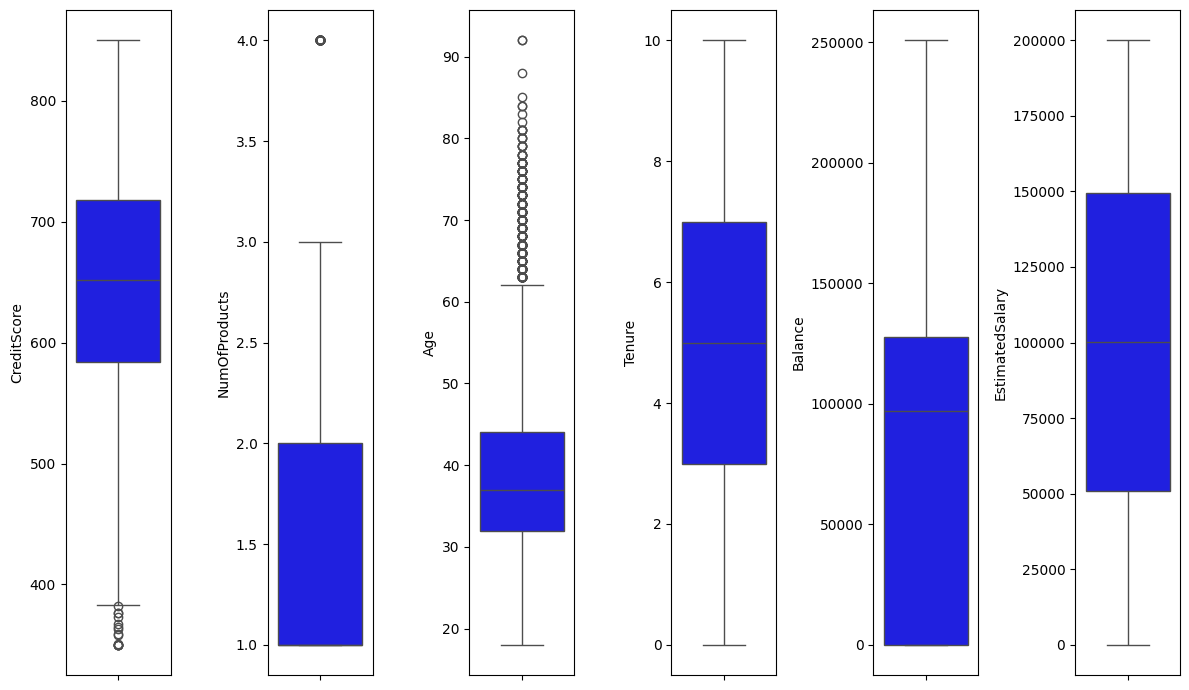

In [11]:
features = numericals.columns  # Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(12,7))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=numericals[features[i]], color='blue', orient='v')
  plt.tight_layout()

plt.show()  # Untuk menampilkan plotnya

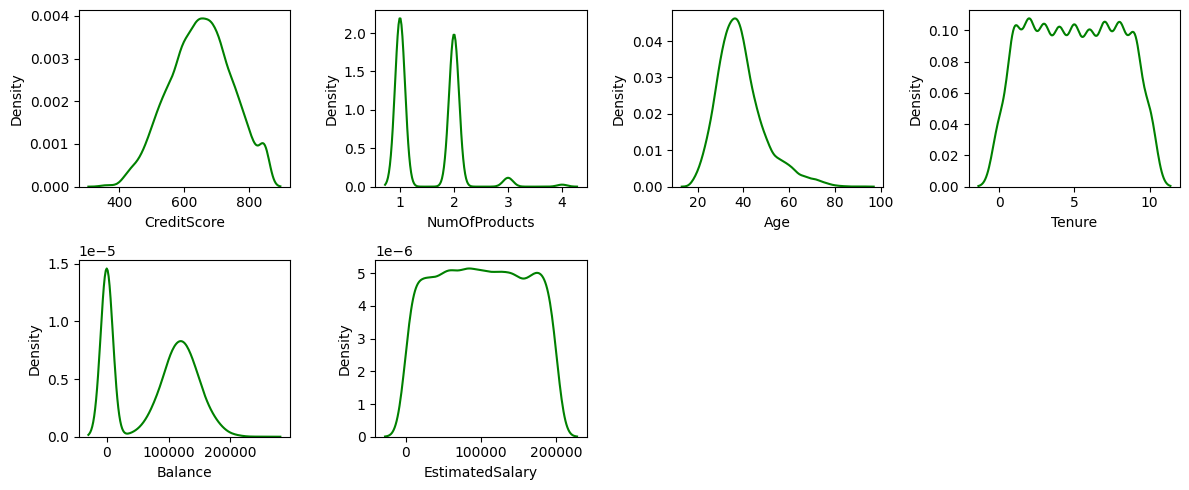

In [12]:
features = numericals.columns  # Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(12,5))
for i in range(0, len(features)):
  plt.subplot(2, 4, i+1)
  sns.kdeplot(x = df[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

plt.show()  # Untuk menampilkan plotnya

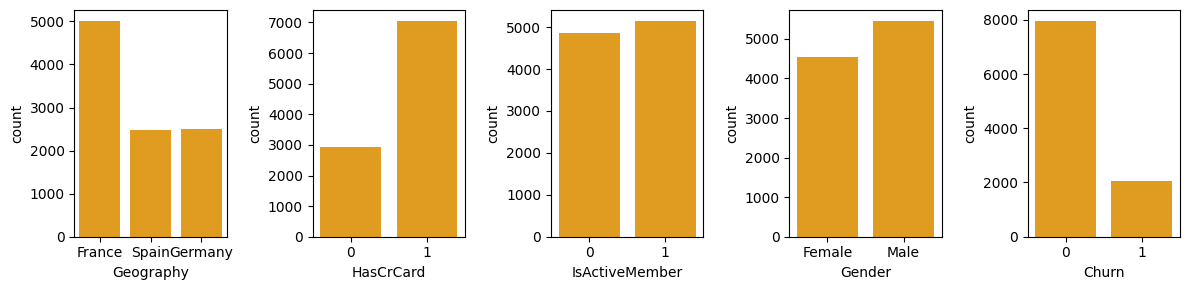

In [13]:
features = categorical.columns  # Mengambil nama kolom sebagai daftar fitur
plt.figure(figsize=(12,3))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.countplot(x=df[features[i]], color='orange')
  plt.tight_layout()

**Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing**

* Terlihat pada boxplot chart bahwa pada kolom 'creditscore', 'NumOfProducts', dan 'Age' terdapat outlier.
* Dari kdeplot yang menunjukkan skewness dari data tersebut, dapat terlihat bahwa sebagian besar kolom 'Age' cenderung positively skew. Sedangkan untuk kolom 'Balance' dan 'NumOfProducts' cenderung memiliki distribusi bimodal.
* Dari kolom2 categorical yang ada dapat terlihat bahwa kolom 'Geography' didominasi oleh France, kolom 'HasCrCard' didominasi oleh nasabah yang memiliki kartu kredit (value = 1), dan kolom 'IsActiveMember' didominasi oleh nasabah yang aktif, kolom 'Gender' didominasi oleh Male, Kolom 'Churn' lebih banyak yang tidak churn (value = 0).
* Untuk next step yang harus di follow up saat data pre-processing ialah handling data outlier, melakukan label encoding (untuk kolom 'gender', dll), kolom 'negara' (melakukan one-hot encoding), normalisasi, standarisasi, dan class imbalance.


## **3.) Multivariate Analysis**

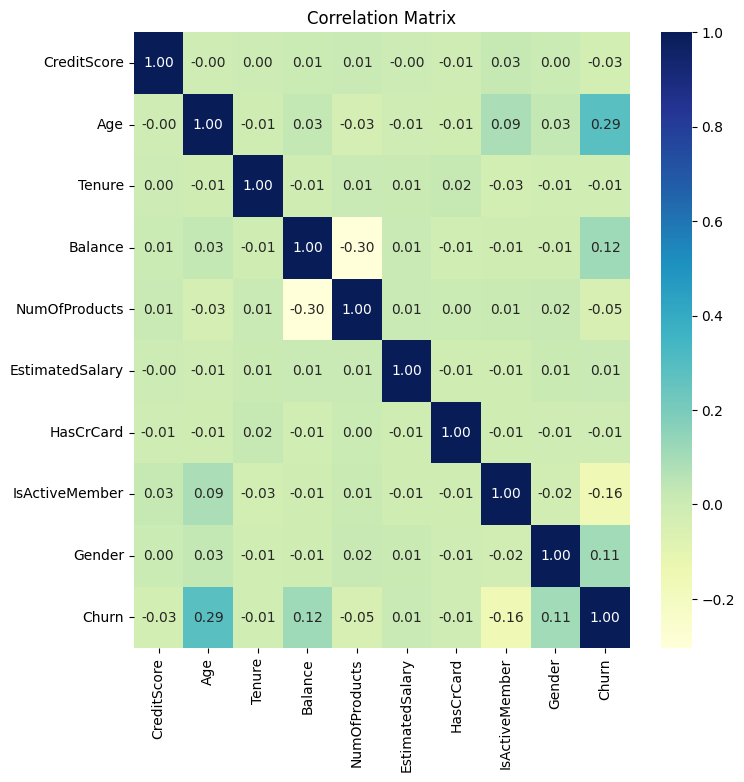

In [14]:
korelasi = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','HasCrCard','IsActiveMember','Gender','Churn']]
map_gender = {
    'Male':0,
    'Female':1,
}
korelasi['Gender'] = korelasi['Gender'].map(map_gender)
df_x = korelasi
plt.figure(figsize=(8,8))
sns.heatmap(df_x.corr(),annot=True,cmap='YlGnBu',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

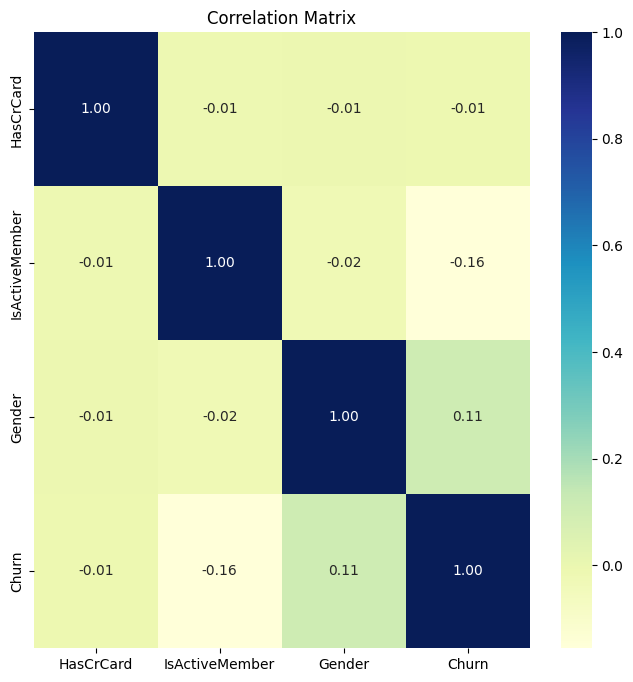

In [15]:
korelasi = df[['Geography', 'HasCrCard', 'IsActiveMember', 'Gender', 'Churn']]
map_gender = {
    'Male':0,
    'Female':1,
}
korelasi['Gender'] = korelasi['Gender'].map(map_gender)
df_y = korelasi
plt.figure(figsize=(8,8))
sns.heatmap(df_y.corr(method = 'spearman'),annot=True,cmap='YlGnBu',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1500x1500 with 0 Axes>

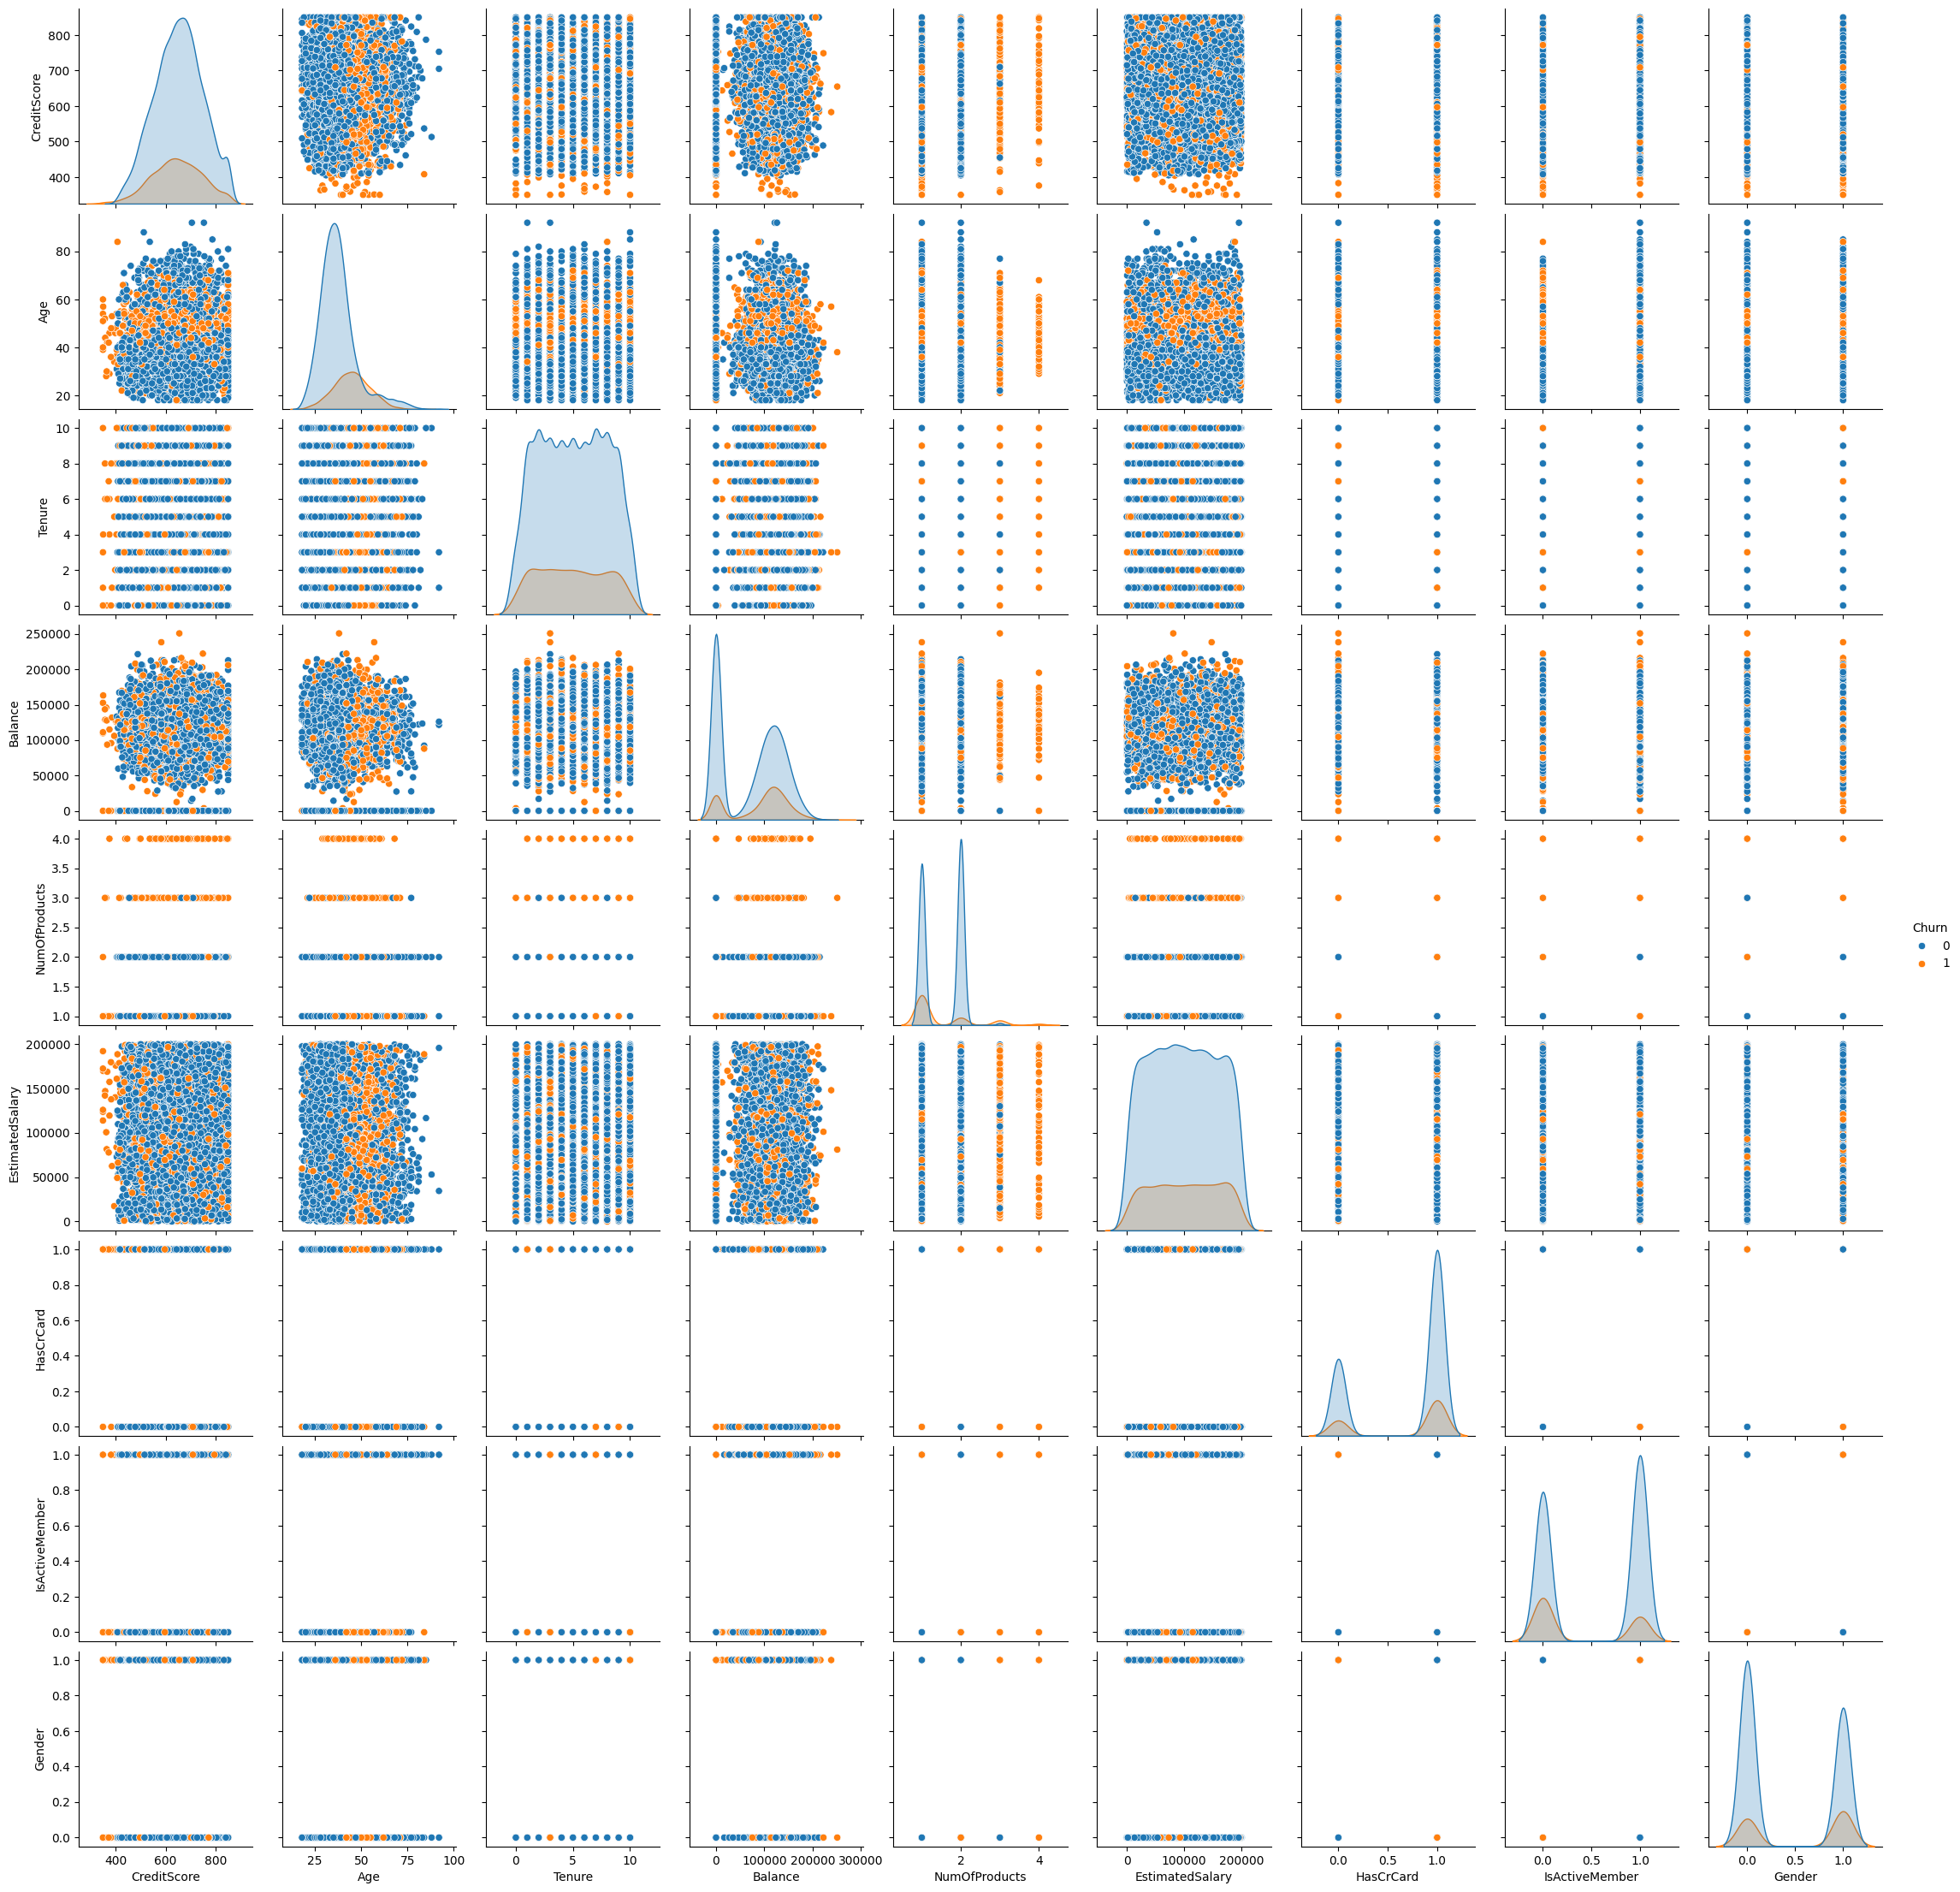

In [16]:
plt.figure(figsize=(15,15))
sns.pairplot(df_x, hue='Churn', diag_kind='kde')

In [17]:
df_x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Gender,Churn
0,619,42,2,0.00,1,101348.88,1,1,1,1
1,608,41,1,83807.86,1,112542.58,0,1,1,0
2,502,42,8,159660.80,3,113931.57,1,0,1,1
3,699,39,1,0.00,2,93826.63,0,0,1,0
4,850,43,2,125510.82,1,79084.10,1,1,1,0


In [18]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='IsActiveMember', ylabel='count'>

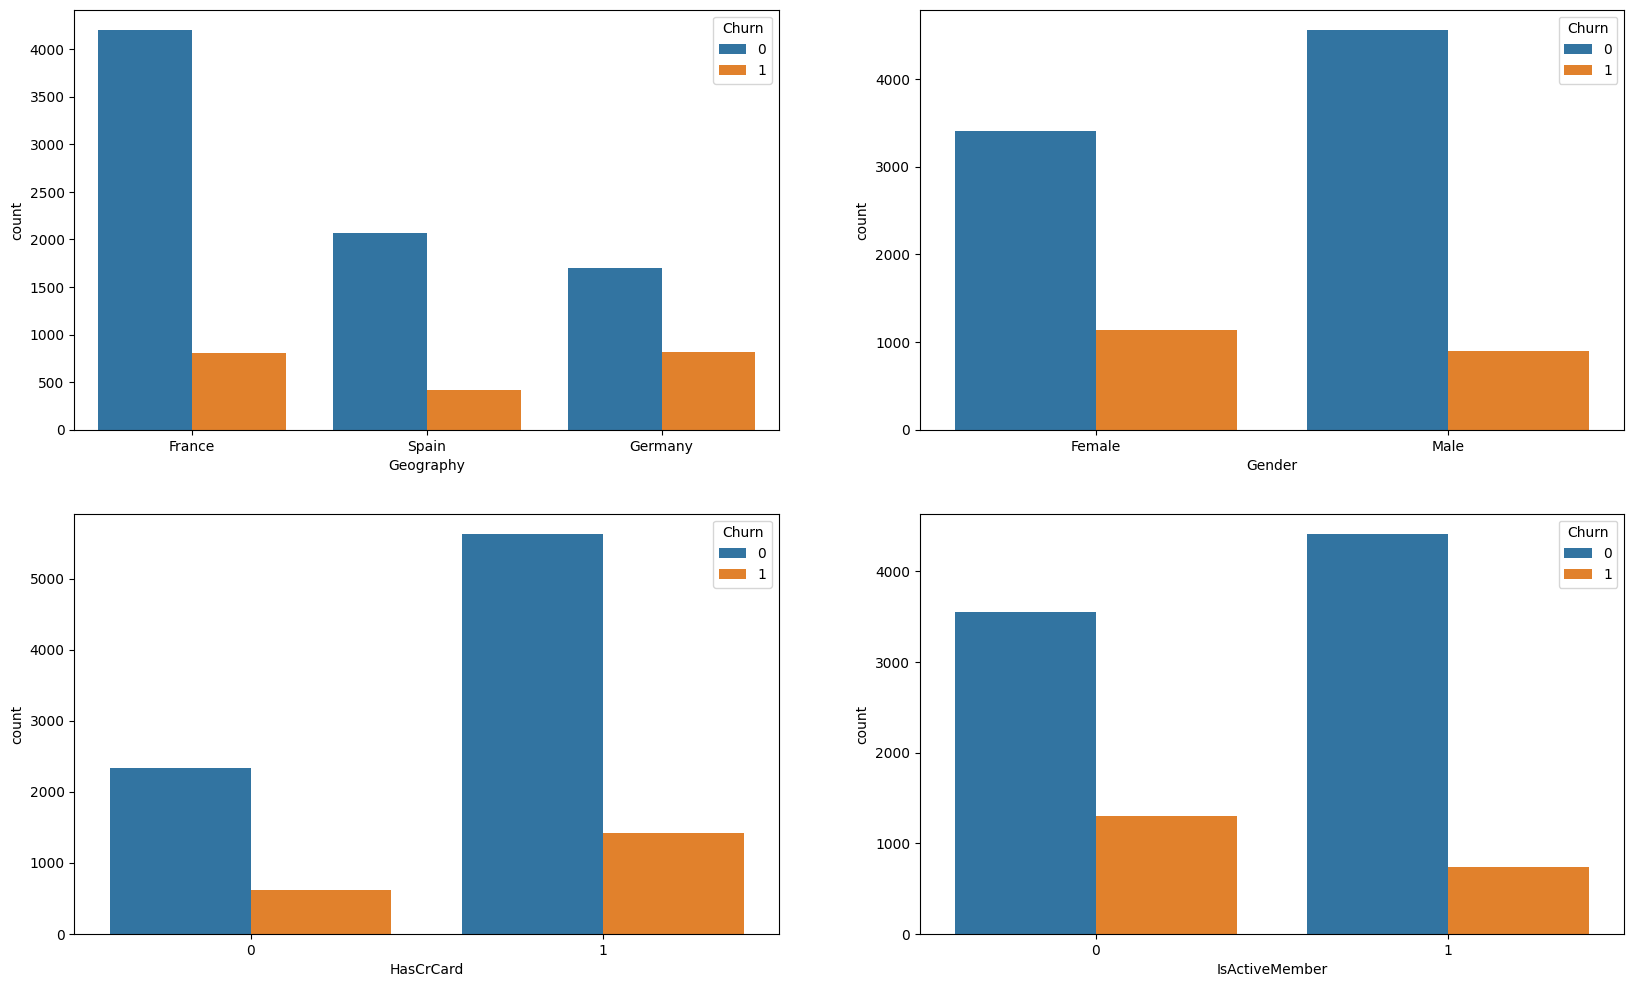

In [19]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Churn',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Churn',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Churn',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Churn',data = df, ax=axarr[1][1])

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
- Kolom "churn" memiliki korelasi positive yang moderate/menengah terhadap kolom "age" (korelasi = 0.29), "balance" (korelasi = 0.12), dan "Gender" (korelasi = 0.11). Sedangkan, pada kolom "IsActiveMember" (korelasi = -0.16) memiliki korelasi negative. Oleh karena itu, feature-feature tersebut harus dipertahanakan.
- Nasabah yang memiliki produk 3 & 4 cenderung churn

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
- Pada kolom "balance" juga memiliki korelasi negative (korelasi = -0.30) terhadap "NumOfProducts". Oleh karena itu, untuk feature ini diperlukan analisa multikolinearitas.


## 4.) Business Insight

Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan rekomendasinya untuk bisnis.

### Kategori Umur Berdasarkan Customer yang Churned

a) Klasifikasi Umur

Menurut Kemenkes, usia terbagi menjadi kelompok berikut
- 0  - 11 tahun = Kanak-kanak (child)
- 12 - 25 tahun = Remaja (teenager)
- 26 - 45 tahun = Dewasa (adult)
- 46 - 65 tahun = Lansia (elderly)
- '> 65 tahun = Manula'

Link = https://jurnal.dpr.go.id/index.php/aspirasi/article/download/1589/pdf

In [20]:
#perubahan umur menjadi kelompok umur berdasarkan kemenkes
group_age = []
for age in df['Age'] :
    if age >= 0 and age <= 11 :
        age = 'child'
    elif age >= 12 and age <= 25 :
        age = 'teenager'
    elif age >= 26 and age <= 45 :
        age = 'adult'
    elif age >= 46 and age <= 65 :
        age = 'elderly'
    else :
        age = 'seniors'
    group_age.append(age)

#memasukkan kolom age baru yang telah diubah menjadi kategorikal
df['Group_Age'] = group_age
df['Group_Age'].value_counts()

adult       7278
elderly     1847
teenager     611
seniors      264
Name: Group_Age, dtype: int64

In [21]:
#diubah a b c... agar saat diplot urut
map_age = {
    'teenager' : 'a.teenager',
    'adult' : 'b.adult',
    'elderly': 'c.elderly',
    'seniors': 'd.seniors'
}
df['Group_Age'] = df['Group_Age'].map(map_age)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Group_Age
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,b.adult
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,b.adult
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,b.adult
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,b.adult
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,b.adult


In [22]:
#menghitung unique value
df['Group_Age'].value_counts()

b.adult       7278
c.elderly     1847
a.teenager     611
d.seniors      264
Name: Group_Age, dtype: int64

In [23]:
#membuat fungsi pivot table agar langsung mendapatkan nilai persen customer
def tabel_pivot(x) : # x=nama kolom yang akan di group by

    #pivot table
    group1 = pd.pivot_table(data = df,
                            index = [x,'Churn'],
                            values = ['CreditScore'],
                            aggfunc = {'CreditScore':'count'}).reset_index()
    group1.columns = [x,'Churn','Total_Customer']

    #mendapatkan persentase total customer
    list_kosong=[]
    for a in group1[x].unique() :
        group = group1[group1[x] == a]
        total = group['Total_Customer'].sum()
        for b in range(len(group)) :
            group = group.reset_index(drop = True)
            isi = group['Total_Customer'][b]/total*100
            isi = round(isi,2)
            list_kosong.append(isi)
    group1['Persen_Customer1'] = list_kosong #total 100 persen kolom 'x'

    #sorting berdasarkan kolum churn
    group1 = group1.sort_values(by='Churn', ascending=True)

    list_kosong=[]
    for a in group1['Churn'].unique() :
        group = group1[group1['Churn'] == a]
        total = group['Total_Customer'].sum()
        for b in range(len(group)) :
            group = group.reset_index(drop = True)
            isi = group['Total_Customer'][b]/total*100
            isi = round(isi,2)
            list_kosong.append(isi)
    group1['Persen_Customer2'] = list_kosong #total 100 persen kolom churn

    #sorting dikembalikan lagi terhap kolom 'x'
    group1 = group1.sort_values(by=x, ascending=True)

    return group1,x



In [24]:
#memanggil fungsi tabel_pivot
group1,x = tabel_pivot('Group_Age')
group1.Churn = ['Yes' if x == 1 else 'No' for x in group1.Churn]

#reshape group1
group1_reshape = group1.pivot_table(index = x,
                                    columns = 'Churn',
                                    values = 'Persen_Customer1')

In [25]:
display(group1)
display(group1_reshape)

,Group_Age,Churn,Total_Customer,Persen_Customer1,Persen_Customer2
0,a.teenager,No,565,92.47,7.10
1,a.teenager,Yes,46,7.53,2.26
2,b.adult,No,6244,85.79,78.41
3,b.adult,Yes,1034,14.21,50.76
4,c.elderly,No,925,50.08,11.62
5,c.elderly,Yes,922,49.92,45.26
6,d.seniors,No,229,86.74,2.88
7,d.seniors,Yes,35,13.26,1.72


Churn,No,Yes
Group_Age,,
a.teenager,92.47,7.53
b.adult,85.79,14.21
c.elderly,50.08,49.92
d.seniors,86.74,13.26


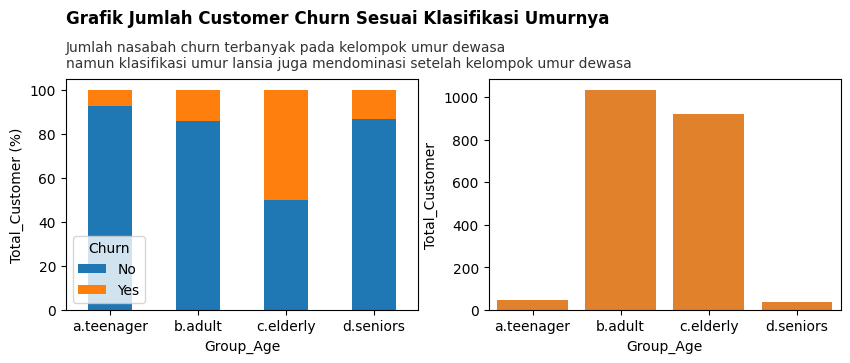

In [26]:
#Visualisasi

fig, ax = plt.subplots(1,2, figsize = (10,3),sharex=False)

group1_reshape.plot(kind = 'bar', stacked =True, ax=ax[0])

color='#FF7F0E'
sns.barplot(data=group1[group1['Churn']=='Yes'], x='Group_Age', y='Total_Customer',color=color)

for tick in ax[0].get_xticklabels():
    tick.set_rotation(360)

#setting
ax[0].set_title('Grafik Jumlah Customer Churn Sesuai Klasifikasi Umurnya',
                loc = 'left' ,pad = 40,fontweight = 'bold')
ax[0].set_ylabel('Total_Customer (%)')
ax[0].set_xlabel('Group_Age')
#subtitle
sub_title = str("Jumlah nasabah churn terbanyak pada kelompok umur dewasa" +
            "\nnamun klasifikasi umur lansia juga mendominasi setelah kelompok umur dewasa ")

x_start, x_end = ax[1].get_xlim()
y_start, y_end = ax[0].get_ylim()
ax[0].text(x=x_start ,y = y_end*1.05
            ,s = sub_title
            ,ha= 'left',alpha = 0.8)

plt.show()


Keterangan :

Dapat terlihat bahwa customer `churn` kebanyakan berada di **usia 26 - 45 (Adults) dan 46 - 65 (Elderly)** dibandingkan dengan usia yang lebih muda. Hal ini bisa saja disebabkan oleh preferensi servis dari setiap kategori umur. Oleh karena itu, bank direkomendasi kan untuk me-review kembali targeted nasabah ini dan bisa membuat strategi khusus dapat berupa program atau promo khusus untuk nasabah tersebut.

### Keaktifan Member Berdasarkan Customer yang Churned

In [27]:
#memanggil fungsi tabel_pivot
group1,x = tabel_pivot('IsActiveMember')
group1.Churn = ['Yes' if x == 1 else 'No' for x in group1.Churn]
group1.IsActiveMember = ['Member' if x == 1 else 'Non_Member' for x in group1.IsActiveMember]

#reshape group1
group1_reshape = group1.pivot_table(index = 'Churn',
                                    columns = x,
                                    values = 'Persen_Customer2')

In [28]:
display(group1)
display(group1_reshape)

,IsActiveMember,Churn,Total_Customer,Persen_Customer1,Persen_Customer2
0,Non_Member,No,3547,73.15,44.54
1,Non_Member,Yes,1302,26.85,63.92
2,Member,No,4416,85.73,55.46
3,Member,Yes,735,14.27,36.08


IsActiveMember,Member,Non_Member
Churn,,
No,55.46,44.54
Yes,36.08,63.92


Visualisasi

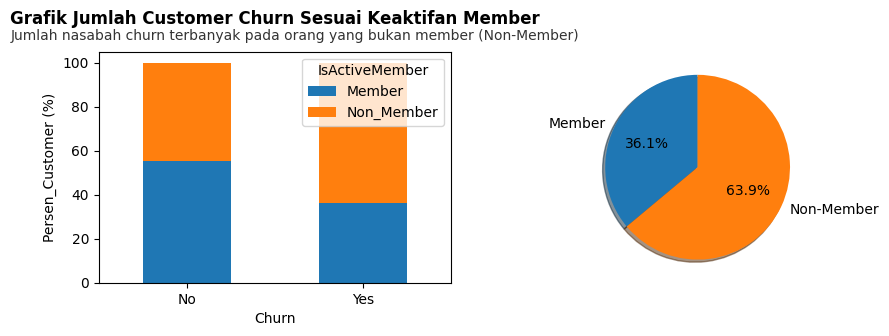

In [29]:
fig, ax = plt.subplots(1,2, figsize = (10,3),sharex=False)

group1_reshape.plot(kind = 'bar', stacked =True, ax=ax[0])

data = group1.Persen_Customer2[group1['Churn']=='Yes'].sort_values(ascending=True)
label = ['Member','Non-Member']
colors = ['#1F77B4','#FF7F0E']
ax[1].pie(x=data,labels=label,colors=colors,autopct='%1.1f%%',shadow=True, startangle=90)

for tick in ax[0].get_xticklabels():
    tick.set_rotation(360)

#setting
ax[0].set_title('Grafik Jumlah Customer Churn Sesuai Keaktifan Member',
                    loc = 'center' ,pad = 20,fontweight = 'bold')
ax[0].set_ylabel('Persen_Customer (%)')
ax[0].set_xlabel('Churn')
#subtitle
sub_title = str("Jumlah nasabah churn terbanyak pada orang yang bukan member (Non-Member)")

x_start, x_end = ax[1].get_xlim()
y_start, y_end = ax[0].get_ylim()
ax[0].text(x=x_start*0.8 ,y = y_end*1.05
            ,s = sub_title
            ,ha= 'left',alpha = 0.8)

plt.show()


Keterangan :
Kebanyakan customer yang `churn` ialah customer yang **bukan member yang aktif**. Oleh karena itu, direkomendasikan untuk bank membuat sebuah program yang dimana dapat membuat member yang tidak aktif ini untuk menjadi aktif untuk menghindari customer menjadi churn

### Kategori Gender Berdasarkan Customer yang Churned

In [30]:
#memanggil fungsi tabel_pivot
group1,x = tabel_pivot('Gender')
group1.Churn = ['Yes' if x == 1 else 'No' for x in group1.Churn]

#reshape group1
group1_reshape = group1.pivot_table(index = 'Churn',
                                    columns = x,
                                    values = 'Persen_Customer2')

In [31]:
display(group1)
display(group1_reshape)

,Gender,Churn,Total_Customer,Persen_Customer1,Persen_Customer2
0,Female,No,3404,74.93,42.75
1,Female,Yes,1139,25.07,55.92
2,Male,No,4559,83.54,57.25
3,Male,Yes,898,16.46,44.08


Gender,Female,Male
Churn,,
No,42.75,57.25
Yes,55.92,44.08


Visualisasi

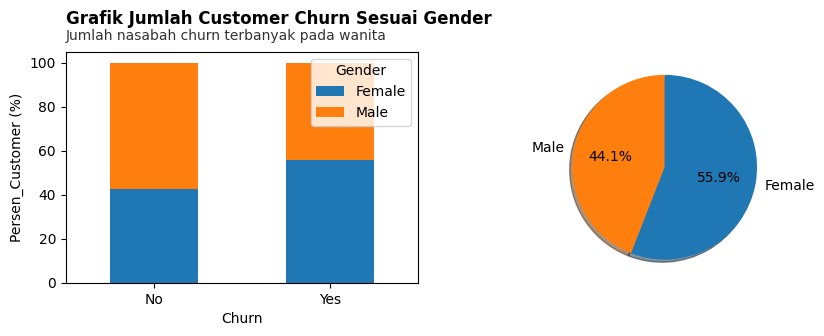

In [32]:
fig, ax = plt.subplots(1,2, figsize = (10,3),sharex=False)

group1_reshape.plot(kind = 'bar', stacked =True, ax=ax[0],legend=True)

data = group1.Persen_Customer2[group1['Churn']=='Yes'].sort_values(ascending=True)
label = ['Male','Female']
colors = ['#FF7F0E','#1F77B4']
ax[1].pie(x=data,labels=label,colors=colors,autopct='%1.1f%%',shadow=True, startangle=90)

for tick in ax[0].get_xticklabels():
    tick.set_rotation(360)

#setting
ax[0].set_title('Grafik Jumlah Customer Churn Sesuai Gender',
                loc = 'left' ,pad = 20,fontweight = 'bold')
ax[0].set_ylabel('Persen_Customer (%)')
ax[0].set_xlabel('Churn')
#subtitle
sub_title = str("Jumlah nasabah churn terbanyak pada wanita")

x_start, x_end = ax[1].get_xlim()
y_start, y_end = ax[0].get_ylim()
ax[0].text(x=x_start*0.4 ,y = y_end*1.05
            ,s = sub_title
            ,ha= 'left',alpha = 0.8)

plt.show()

Keterangan :
Kebanyakan customer yang `churn` ialah customer yang **female**. Oleh karena itu, direkomendasikan untuk bank membuat sebuah program khusus untuk men-engage customer perempuan untuk mencegah customer menjadi churn.

In [33]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Group_Age
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,b.adult
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,b.adult
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,b.adult
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,b.adult
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,b.adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,b.adult
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,b.adult
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,b.adult
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,b.adult


### Kategori Jumlah Produk yang Dipunyai Customer

In [34]:
group1,x = tabel_pivot('NumOfProducts')
group1.Churn = ['Yes' if x == 1 else 'No' for x in group1.Churn]
group1.NumOfProducts = group1.NumOfProducts.astype(str)

#reshape group1
group1_reshape = group1.pivot_table(index = 'NumOfProducts',
                                    columns = 'Churn',
                                    values = 'Total_Customer')

xy = group1[group1.Churn=='Yes'].sort_values(by='Persen_Customer1',ascending=False)

In [35]:
display(group1)
display(group1_reshape)

,NumOfProducts,Churn,Total_Customer,Persen_Customer1,Persen_Customer2
0,1,No,3675,72.29,46.15
1,1,Yes,1409,27.71,69.17
2,2,No,4242,92.42,53.27
3,2,Yes,348,7.58,17.08
4,3,No,46,17.29,0.58
5,3,Yes,220,82.71,10.80
6,4,Yes,60,100.00,2.95


Churn,No,Yes
NumOfProducts,,
1,3675.0,1409.0
2,4242.0,348.0
3,46.0,220.0
4,NaN,60.0


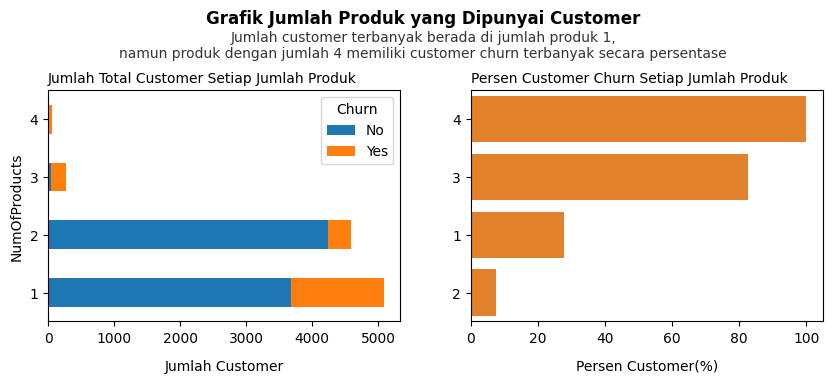

In [36]:
fig, ax = plt.subplots(1,2, figsize = (10,3),sharey=False)

#plot
group1_reshape.plot(kind='barh',stacked=True,ax=ax[0])
sns.barplot(data=xy ,x='Persen_Customer1',y='NumOfProducts',color='#FF7F0E',ax=ax[1])
#title
fig.suptitle('Grafik Jumlah Produk yang Dipunyai Customer'
             ,y= 1.15,fontweight = 'bold')
ax[0].set_title('Jumlah Total Customer Setiap Jumlah Produk'
                ,loc='left',fontsize=10)
ax[1].set_title('Persen Customer Churn Setiap Jumlah Produk'
               ,loc='left',fontsize=10)
#axis
ax[0].set_xlabel('Jumlah Customer',labelpad=10)
ax[1].set_xlabel('Persen Customer(%)',labelpad=10)
ax[1].set_ylabel('')

#subtitle
sub_title='Jumlah customer terbanyak berada di jumlah produk 1,\nnamun produk dengan jumlah 4 memiliki customer churn terbanyak secara persentase'
fig.text(s = sub_title,ha= 'center',alpha = 0.8,
        x=0.5,y=0.99)

plt.show()

# **STAGE 2 - DATA PRE-PROCESSING**

## 1.) Data Cleansing

### Handle Missing Value

In [37]:
# cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
 14  Group_Age        10000 non-null  object 
dtypes: float64(2), int64(9), object(4)
memory usage: 1.1+ MB


In [38]:
df.isna().sum() # menampilkan jumlah missing value setiap kolom

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
Group_Age          0
dtype: int64

Semua tipe data sudah sesuai dan tidak ada data kosong

### Handle Duplicated Data

In [39]:
df.duplicated().sum() # check data duplikat

0

Tidak ada data yang duplikat pada dataset

## 2.) Feature Engineering

### Analisa Multikolinearitas Antar Feature (NumOfProducts & Balance)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

selected_columns = ['NumOfProducts', 'Balance']
df_subset = df[selected_columns]
X = add_constant(df_subset)

# Menghitung nilai VIF untuk setiap feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

        Variable        VIF
0          const  12.445353
1  NumOfProducts   1.101959
2        Balance   1.101959


**Summary**
<br> Dari hasil yang ada, nilai VIF yang ada relatif kecil (VIF < 5) yang menunjukkan bahwa tidak ada bukti multikolinearitas antara kolom "NumOfProducts" dan "Balance". Oleh karena itu, kedua kolom tersebut tetap digunakan sebagai feature.

### Feature Selection

In [41]:
df.sample(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Group_Age
5062,5063,15650432,Liu,849,Germany,Male,41,10,84622.13,1,1,1,198072.16,0,b.adult
8958,8959,15710726,Hughes,573,France,Male,52,8,0.00,2,0,1,178229.04,0,c.elderly


In [42]:
#melakukan drop kolom 'RowNumber', 'Surname', 'CustomerId'
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis = 1) # feature 'Surname', 'RowNumber', 'CustomerID' tidak penting terhadap taget


In [43]:
df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Group_Age
7492,682,France,Male,28,10,200724.96,1,0,1,82872.64,1,b.adult
4891,765,Germany,Male,34,5,86055.17,2,1,1,104220.50,0,b.adult


### Feature Extraction

In [44]:
# Balance Categories
df['Balance_Category'] = pd.cut(df['Balance'], bins=[-0.001, 97199, 127644, 251000], labels=['Low', 'Medium', 'High'])

# Credit Score Ranges
df['CreditScore_Range'] = pd.cut(df['CreditScore'], bins=[349, 584, 652, 718, 850], labels=['Poor', 'Fair', 'Good', 'Excellent'])

# Tenure Categories
df['Tenure_Category'] = pd.cut(df['Tenure'], bins=[-0.001, 3, 5, 10], labels=['Short Term', 'Medium Term', 'Long Term'])

# Salary Range
df['Salary_Range'] = pd.cut(df['EstimatedSalary'], bins=[0, 51002, 100194, 149388, 200000], labels=['Low', 'Medium', 'High','Very High'])

# tambahan feature extraction

df['TenureByAge'] = df['Tenure'] / df['Age']

df['CreditScoreGivenAge'] = df['CreditScore'] / df['Age']

Pembagian range setiap kategori didasari dari nilai min, quartile (1,2,3), dan max dari masing-masing kolom

In [45]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Group_Age,Balance_Category,CreditScore_Range,Tenure_Category,Salary_Range,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,b.adult,Low,Fair,Short Term,High,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,b.adult,Low,Fair,Short Term,High,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,b.adult,High,Poor,Long Term,High,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,b.adult,Low,Good,Short Term,Medium,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,b.adult,Medium,Excellent,Short Term,Medium,0.046512,19.767442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,b.adult,Low,Excellent,Medium Term,Medium,0.128205,19.769231
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,b.adult,Low,Poor,Long Term,High,0.285714,14.742857
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,b.adult,Low,Good,Long Term,Low,0.194444,19.694444
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,b.adult,Low,Excellent,Short Term,Medium,0.071429,18.380952


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CreditScore          10000 non-null  int64   
 1   Geography            10000 non-null  object  
 2   Gender               10000 non-null  object  
 3   Age                  10000 non-null  int64   
 4   Tenure               10000 non-null  int64   
 5   Balance              10000 non-null  float64 
 6   NumOfProducts        10000 non-null  int64   
 7   HasCrCard            10000 non-null  int64   
 8   IsActiveMember       10000 non-null  int64   
 9   EstimatedSalary      10000 non-null  float64 
 10  Churn                10000 non-null  int64   
 11  Group_Age            10000 non-null  object  
 12  Balance_Category     10000 non-null  category
 13  CreditScore_Range    10000 non-null  category
 14  Tenure_Category      10000 non-null  category
 15  Salary_Range        

Beberapa ide features yang bisa ditambahkan yang mungkin akan membantu meningkatkan performansi model, antara lain:
- **Balance-to-Salary Ratio**: Menghitung rasio antara saldo akun dan estimasi gaji pelanggan. Rasio ini dapat memberikan gambaran tentang seberapa besar bagian dari gaji yang disimpan atau diinvestasikan oleh pelanggan.
- **Average Transaction Amount**: Menghitung rata-rata jumlah transaksi per pelanggan. Ini dapat memberikan wawasan tentang seberapa sering pelanggan berinteraksi dengan produk atau layanan, dan seberapa besar nilai transaksi yang mereka lakukan.
- **Tenure and NumOfProducts Interaction**: Fitur ini dapat memberikan model informasi tambahan tentang seberapa intensif pelanggan menggunakan produk atau layanan selama periode waktu tertentu. Dimana dapat diasumsikan bahwa semakin lama seseorang menjadi pelanggan dan semakin banyak produk yang mereka miliki, semakin kuat keterikatan mereka dengan layanan atau produk perusahaan tersebut.
- **Salary to CreditScore Ratio**: fitur ini mencerminkan seberapa besar pendapatan seseorang dibandingkan dengan skor kredit mereka. Rasio ini dapat memberikan wawasan tentang seberapa baik seseorang mengelola utang atau kredit relatif terhadap tingkat pendapatan mereka.

**Tetapi untuk 4 ide fitur tambahan ini tidak akan ditambahkan atau diimplementasikan ke dataset.**


### Feature Encoding

In [47]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Group_Age,Balance_Category,CreditScore_Range,Tenure_Category,Salary_Range,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,b.adult,Low,Fair,Short Term,High,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,b.adult,Low,Fair,Short Term,High,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,b.adult,High,Poor,Long Term,High,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,b.adult,Low,Good,Short Term,Medium,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,b.adult,Medium,Excellent,Short Term,Medium,0.046512,19.767442


In [48]:
# one hot encoding
for cat in ['Geography']:
    onehots = pd.get_dummies(df[cat], prefix=cat, drop_first = False)
    df =  df.join(onehots)

In [49]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Group_Age,Balance_Category,CreditScore_Range,Tenure_Category,Salary_Range,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,...,b.adult,Low,Fair,Short Term,High,0.047619,14.738095,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,...,b.adult,Low,Fair,Short Term,High,0.024390,14.829268,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,...,b.adult,High,Poor,Long Term,High,0.190476,11.952381,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,...,b.adult,Low,Good,Short Term,Medium,0.025641,17.923077,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,...,b.adult,Medium,Excellent,Short Term,Medium,0.046512,19.767442,0,0,1


In [50]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CreditScore          10000 non-null  int64   
 1   Geography            10000 non-null  object  
 2   Gender               10000 non-null  object  
 3   Age                  10000 non-null  int64   
 4   Tenure               10000 non-null  int64   
 5   Balance              10000 non-null  float64 
 6   NumOfProducts        10000 non-null  int64   
 7   HasCrCard            10000 non-null  int64   
 8   IsActiveMember       10000 non-null  int64   
 9   EstimatedSalary      10000 non-null  float64 
 10  Churn                10000 non-null  int64   
 11  Group_Age            10000 non-null  object  
 12  Balance_Category     10000 non-null  category
 13  CreditScore_Range    10000 non-null  category
 14  Tenure_Category      10000 non-null  category
 15  Salary_Range        

In [52]:
df = df.drop(columns =['Geography']).copy()

In [53]:
# label encoding
map_gender = {'Male':0,'Female':1}
map_grup_age = { 'a.teenager':0,'b.adult':1,'c.elderly':2,'d.seniors':3}
map_balance = {'Low':0, 'Medium':1, 'High':2}
map_credit_score = {'Poor':0, 'Fair':1, 'Good':2, 'Excellent':3}
map_tenure = {'Short Term':0, 'Medium Term':1, 'Long Term':2}
map_salary = {'Low':0, 'Medium':1, 'High':2, 'Very High':3}

df['Gender'] = df['Gender'].map(map_gender)
df['Group_Age'] = df['Group_Age'].map(map_grup_age)
df['Balance_Category'] = df['Balance_Category'].map(map_balance).astype(int)
df['CreditScore_Range'] = df['CreditScore_Range'].map(map_credit_score).astype(int)
df['Tenure_Category'] = df['Tenure_Category'].map(map_tenure).astype(int)
df['Salary_Range'] = df['Salary_Range'].map(map_salary).astype(int)

In [54]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Group_Age,Balance_Category,CreditScore_Range,Tenure_Category,Salary_Range,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,2,0.047619,14.738095,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,1,0,1,0,2,0.024390,14.829268,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,2,0,2,2,0.190476,11.952381,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,2,0,1,0.025641,17.923077,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,1,1,3,0,1,0.046512,19.767442,0,0,1


In [55]:
df.info() # checking semua column telah menjadi data numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CreditScore          10000 non-null  int64  
 1   Gender               10000 non-null  int64  
 2   Age                  10000 non-null  int64  
 3   Tenure               10000 non-null  int64  
 4   Balance              10000 non-null  float64
 5   NumOfProducts        10000 non-null  int64  
 6   HasCrCard            10000 non-null  int64  
 7   IsActiveMember       10000 non-null  int64  
 8   EstimatedSalary      10000 non-null  float64
 9   Churn                10000 non-null  int64  
 10  Group_Age            10000 non-null  int64  
 11  Balance_Category     10000 non-null  int32  
 12  CreditScore_Range    10000 non-null  int32  
 13  Tenure_Category      10000 non-null  int32  
 14  Salary_Range         10000 non-null  int32  
 15  TenureByAge          10000 non-null  

## 3.) Split Data to Train and Test

In [56]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Churn']
y = df['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9254 to 7270
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CreditScore          8000 non-null   int64  
 1   Gender               8000 non-null   int64  
 2   Age                  8000 non-null   int64  
 3   Tenure               8000 non-null   int64  
 4   Balance              8000 non-null   float64
 5   NumOfProducts        8000 non-null   int64  
 6   HasCrCard            8000 non-null   int64  
 7   IsActiveMember       8000 non-null   int64  
 8   EstimatedSalary      8000 non-null   float64
 9   Group_Age            8000 non-null   int64  
 10  Balance_Category     8000 non-null   int32  
 11  CreditScore_Range    8000 non-null   int32  
 12  Tenure_Category      8000 non-null   int32  
 13  Salary_Range         8000 non-null   int32  
 14  TenureByAge          8000 non-null   float64
 15  CreditScoreGivenAge  8000 non-null 

## 4.) Handle Outlier

In [57]:
numerical = ['CreditScore', 'NumOfProducts', 'Age','Tenure','Balance','EstimatedSalary','TenureByAge',
            'CreditScoreGivenAge']

In [58]:
# Using Z-score for outlier removal
x_train_z = x_train.copy()
y_train_z = y_train.copy()

for col in numerical:
    z_scores = np.abs(stats.zscore(x_train[col]))
    filter_mask_z = (z_scores < 3)  # Adjust the threshold as needed
    x_train_z = x_train_z[filter_mask_z]
    y_train_z = x_train_z[filter_mask_z]

In [59]:
# Using IQR for outlier removal
x_train_iqr = x_train.copy()
y_train_iqr = y_train.copy()

for col in numerical:
    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1
    filter_mask_iqr = ~((x_train_iqr[col] < (Q1 - 1.5 * IQR)) | (x_train_iqr[col] > (Q3 + 1.5 * IQR)))
    x_train_iqr = x_train_iqr[filter_mask_iqr]
    y_train_iqr = y_train_iqr[filter_mask_iqr]

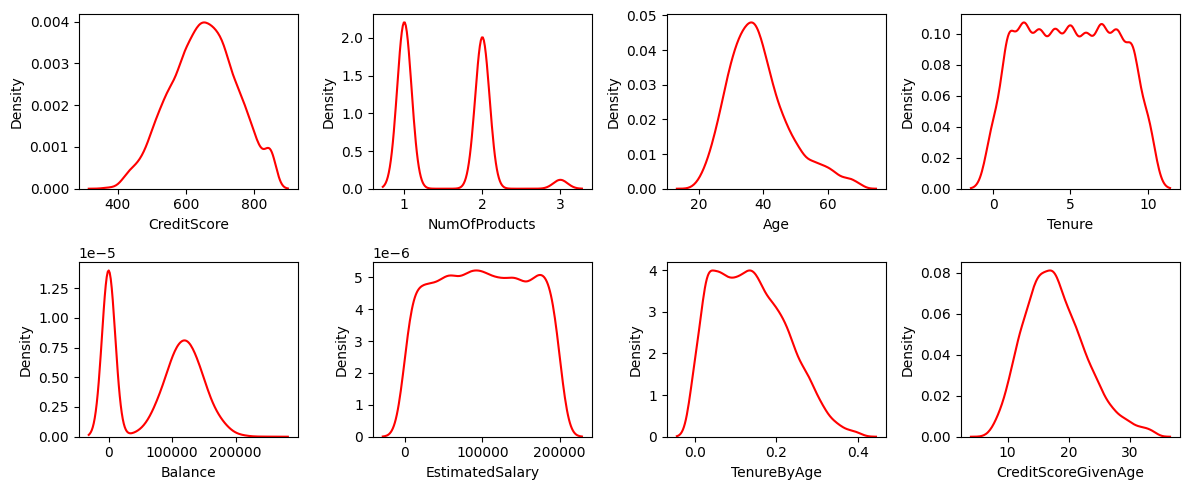

In [60]:
#membandingkan data setelah filter menggunakan plot
#data setelah filter z
plt.figure(figsize=(12,5))
for i in range(0, len(numerical)):
  plt.subplot(2, 4, i+1)
  sns.kdeplot(x = x_train_z[numerical[i]], color = 'red')
  plt.xlabel(numerical[i])
  plt.tight_layout()

plt.show()

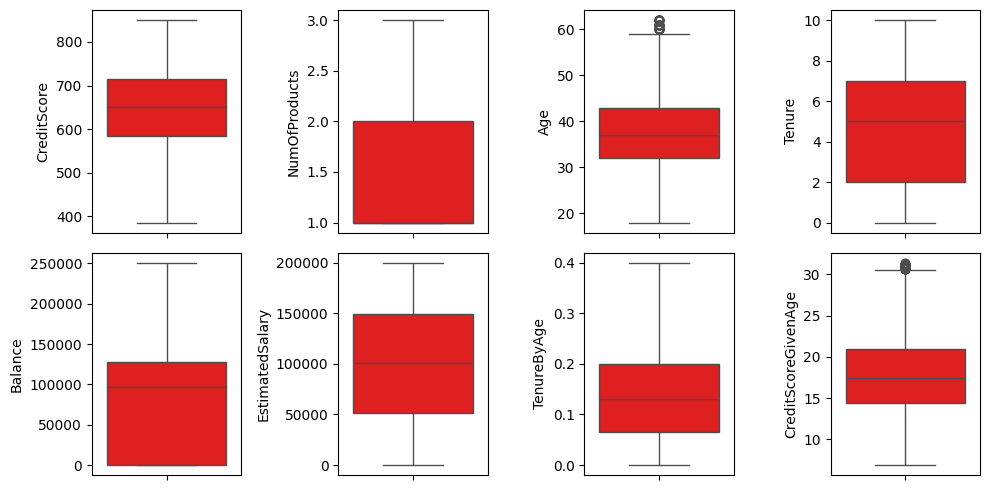

In [61]:
#data setelah filter iqr
plt.figure(figsize=(10,5))
for i in range(0, len(numerical)):
  plt.subplot(2, 4,i+1)
  sns.boxplot(y=x_train_iqr[numerical[i]], color ='red', orient='v')
  plt.tight_layout()



In [62]:
n_z       = (x_train['CreditScore'].count() - x_train_z['CreditScore'].count()) / x_train['CreditScore'].count() * 100
n_kuartil = (x_train['CreditScore'].count() - x_train_iqr['CreditScore'].count()) / x_train['CreditScore'].count() * 100
print('perbedaan jumlah data menggunakan z   : '+ str(round(n_z,2)) + '%')
print('perbedaan jumlah data menggunakan IQR : '+ str(round(n_kuartil,2)) + '%')

perbedaan jumlah data menggunakan z   : 3.19%
perbedaan jumlah data menggunakan IQR : 6.64%


**Output**

Berdasarkan analisa outlier yang ada, dapat terlihat bahwa outlier kebanyakan terdapat pada kolom age yang dimana distribusi age dari nasabah yang ada itu wajar adanya. Oleh karena itu, proses outlier removal pada model ini tidak dilakukan dan bisa langsung menggunakan dataframe yang sudah di split untuk proses selanjutnya.

## 5.) Feature Transformation

In [63]:
#data

#normalisasi
df_norm_train = x_train.copy()
df_norm_test = x_test.copy()

#standarisasi
df_SS_train = x_train.copy()
df_SS_test = x_test.copy()

numerical = numerical

### Standarisasi

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_SS_train)
df_SS_train = scaler.transform(df_SS_train)
df_SS_test = scaler.transform(df_SS_test)
#mengubah dari list ke dalam bentuk data frame
df_SS_train = pd.DataFrame(df_SS_train, columns = x_train.columns)
df_SS_test = pd.DataFrame(df_SS_test, columns = x_test.columns)

In [65]:
df_SS_train.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Group_Age,Balance_Category,CreditScore_Range,Tenure_Category,Salary_Range,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,5.435652e-16,-2.842171e-17,-1.896261e-16,6.661338e-17,-3.099743e-16,1.065814e-16,-3.197442e-17,-1.776357e-17,1.776357e-17,3.175238e-17,-6.594725e-17,-3.730349e-17,-1.065814e-16,1.421085e-17,-7.549517e-17,-4.671818e-16,6.217249e-17,-4.263256e-17,-7.194245e-17
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-3.130418e+00,-9.132476e-01,-1.986800e+00,-1.736467e+00,-1.218471e+00,-9.166877e-01,-1.540351e+00,-1.025834e+00,-1.744600e+00,-2.075210e+00,-8.982762e-01,-1.347070e+00,-1.237854e+00,-1.345767e+00,-1.542301e+00,-2.419259e+00,-9.985011e-01,-5.794672e-01,-5.763880e-01
25%,-6.916511e-01,-9.132476e-01,-6.557859e-01,-6.953935e-01,-1.218471e+00,-9.166877e-01,-1.540351e+00,-1.025834e+00,-8.531146e-01,-3.122622e-01,-8.982762e-01,-4.511139e-01,-1.237854e+00,-4.514211e-01,-8.202841e-01,-7.024437e-01,-9.985011e-01,-5.794672e-01,-5.763880e-01
50%,1.403458e-02,-9.132476e-01,-1.804237e-01,-1.344719e-03,3.257497e-01,-9.166877e-01,6.492027e-01,9.748170e-01,9.811339e-04,-3.122622e-01,-8.982762e-01,4.448422e-01,-1.102256e-01,4.429248e-01,-9.826757e-02,-1.113011e-01,-9.985011e-01,-5.794672e-01,-5.763880e-01
75%,6.989648e-01,1.094993e+00,4.850833e-01,6.927040e-01,8.247131e-01,8.084362e-01,6.492027e-01,9.748170e-01,8.548079e-01,-3.122622e-01,3.068570e-01,1.340798e+00,1.017402e+00,1.337271e+00,6.959506e-01,5.791370e-01,1.001501e+00,1.725723e+00,-5.763880e-01
max,2.058448e+00,1.094993e+00,5.048560e+00,1.733777e+00,2.798656e+00,4.258684e+00,6.492027e-01,9.748170e-01,1.730660e+00,3.213634e+00,1.511990e+00,1.340798e+00,1.017402e+00,1.337271e+00,4.675064e+00,5.361349e+00,1.001501e+00,1.725723e+00,1.734942e+00


In [66]:
df_SS_test.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Group_Age,Balance_Category,CreditScore_Range,Tenure_Category,Salary_Range,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.058054,-0.004519,0.011432,0.015486,0.030721,-0.010135,0.021896,0.023508,-0.029649,-0.006391,0.027869,-0.063165,0.006484,-0.021241,0.006902,-0.048057,0.021500,-0.005475,-0.019357
std,1.013795,0.999829,0.985362,1.018057,0.994830,1.016980,0.990201,0.999374,0.999228,0.988753,0.996150,1.005764,1.011848,0.999614,1.008362,0.974974,1.000051,0.997092,0.988781
min,-3.130418,-0.913248,-1.986800,-1.736467,-1.218471,-0.916688,-1.540351,-1.025834,-1.745964,-2.075210,-0.898276,-1.347070,-1.237854,-1.345767,-1.542301,-2.239255,-0.998501,-0.579467,-0.576388
25%,-0.764295,-0.913248,-0.655786,-1.042418,-1.218471,-0.916688,-1.540351,-1.025834,-0.881833,-0.312262,-0.898276,-1.347070,-1.237854,-1.345767,-0.828910,-0.727765,-0.998501,-0.579467,-0.576388
50%,-0.053421,-0.913248,-0.085351,-0.001345,0.379370,-0.916688,0.649203,0.974817,-0.033375,-0.312262,0.306857,-0.451114,-0.110226,-0.451421,-0.069767,-0.150416,1.001501,-0.579467,-0.576388
75%,0.628915,1.094993,0.485083,1.039728,0.828889,0.808436,0.649203,0.974817,0.815190,-0.312262,1.511990,0.444842,1.017402,0.442925,0.695951,0.503318,1.001501,-0.579467,-0.576388
max,2.058448,1.094993,5.048560,1.733777,2.241662,4.258684,0.649203,0.974817,1.731038,3.213634,1.511990,1.340798,1.017402,1.337271,4.675064,4.548910,1.001501,1.725723,1.734942


### Normalisasi

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_norm_train)
df_norm_train = scaler.transform(df_norm_train)
df_norm_test  = scaler.transform(df_norm_test)
#mengubah dari list ke dalam bentuk data frame
df_norm_train = pd.DataFrame(df_norm_train, columns = x_train.columns)
df_norm_test = pd.DataFrame(df_norm_test, columns = x_test.columns)

In [68]:
x_train.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Group_Age,Balance_Category,CreditScore_Range,Tenure_Category,Salary_Range,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,651.647625,0.454750,38.897750,5.003875,76102.139645,1.531375,0.703500,0.512750,100431.289764,1.177125,0.745375,1.503500,1.097750,1.504750,0.137813,17.926261,0.499250,0.251375,0.249375
std,96.366200,0.497979,10.518953,2.881822,62461.005757,0.579705,0.456743,0.499869,57518.920431,0.567267,0.829836,1.116196,0.886873,1.118206,0.089361,5.402454,0.500031,0.433831,0.432678
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.857143,0.000000,0.000000,0.000000
25%,585.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51364.125000,1.000000,0.000000,1.000000,0.000000,1.000000,0.064516,14.131579,0.000000,0.000000,0.000000
50%,653.000000,0.000000,37.000000,5.000000,96447.520000,1.000000,1.000000,1.000000,100487.720000,1.000000,0.000000,2.000000,1.000000,2.000000,0.129032,17.325000,0.000000,0.000000,0.000000
75%,719.000000,1.000000,44.000000,7.000000,127611.332500,2.000000,1.000000,1.000000,149595.842500,1.000000,1.000000,3.000000,2.000000,3.000000,0.200000,21.054826,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,3.000000,2.000000,3.000000,2.000000,3.000000,0.555556,46.888889,1.000000,1.000000,1.000000


In [69]:
df_norm_train.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Group_Age,Balance_Category,CreditScore_Range,Tenure_Category,Salary_Range,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.603295,0.454750,0.282402,0.500388,0.303319,0.177125,0.703500,0.512750,0.502006,0.392375,0.372688,0.501167,0.548875,0.501583,0.248063,0.310934,0.499250,0.251375,0.249375
std,0.192732,0.497979,0.142148,0.288182,0.248950,0.193235,0.456743,0.499869,0.287766,0.189089,0.414918,0.372065,0.443436,0.372735,0.160850,0.128533,0.500031,0.433831,0.432678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.470000,0.000000,0.189189,0.300000,0.000000,0.000000,0.000000,0.000000,0.256523,0.333333,0.000000,0.333333,0.000000,0.333333,0.116129,0.220653,0.000000,0.000000,0.000000
50%,0.606000,0.000000,0.256757,0.500000,0.384409,0.000000,1.000000,1.000000,0.502288,0.333333,0.000000,0.666667,0.500000,0.666667,0.232258,0.296630,0.000000,0.000000,0.000000
75%,0.738000,1.000000,0.351351,0.700000,0.508618,0.333333,1.000000,1.000000,0.747975,0.333333,0.500000,1.000000,1.000000,1.000000,0.360000,0.385368,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
x_test.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Group_Age,Balance_Category,CreditScore_Range,Tenure_Category,Salary_Range,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,646.053500,0.452500,39.018000,5.048500,78020.88786,1.525500,0.713500,0.524500,98726.040350,1.173500,0.768500,1.43300,1.103500,1.481000,0.138430,17.666654,0.510000,0.249000,0.241000
std,97.689463,0.497863,10.364332,2.933675,62134.21718,0.589511,0.452239,0.499524,57470.903307,0.560852,0.826589,1.12256,0.897324,1.117705,0.090103,5.266923,0.500025,0.432542,0.427797
min,350.000000,0.000000,18.000000,0.000000,0.00000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5.829545,0.000000,0.000000,0.000000
25%,578.000000,0.000000,32.000000,2.000000,0.00000,1.000000,0.000000,0.000000,49712.365000,1.000000,0.000000,0.00000,0.000000,0.000000,0.063745,13.994792,0.000000,0.000000,0.000000
50%,646.500000,0.000000,38.000000,5.000000,99796.46000,1.000000,1.000000,1.000000,98511.730000,1.000000,1.000000,1.00000,1.000000,1.000000,0.131579,17.113695,1.000000,0.000000,0.000000
75%,712.250000,1.000000,44.000000,8.000000,127872.15250,2.000000,1.000000,1.000000,147317.217500,1.000000,2.000000,2.00000,2.000000,2.000000,0.200000,20.645243,1.000000,0.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,216109.88000,4.000000,1.000000,1.000000,199992.480000,3.000000,2.000000,3.00000,2.000000,3.000000,0.555556,42.500000,1.000000,1.000000,1.000000


In [71]:
df_norm_test.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Group_Age,Balance_Category,CreditScore_Range,Tenure_Category,Salary_Range,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.592107,0.452500,0.284027,0.504850,0.310966,0.175167,0.713500,0.524500,0.493474,0.391167,0.384250,0.477667,0.551750,0.493667,0.249174,0.304758,0.510000,0.249000,0.241000
std,0.195379,0.497863,0.140059,0.293368,0.247647,0.196504,0.452239,0.499524,0.287526,0.186951,0.413294,0.374187,0.448662,0.372568,0.162185,0.125308,0.500025,0.432542,0.427797
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023135,0.000000,0.000000,0.000000
25%,0.456000,0.000000,0.189189,0.200000,0.000000,0.000000,0.000000,0.000000,0.248260,0.333333,0.000000,0.000000,0.000000,0.000000,0.114742,0.217399,0.000000,0.000000,0.000000
50%,0.593000,0.000000,0.270270,0.500000,0.397757,0.000000,1.000000,1.000000,0.492402,0.333333,0.500000,0.333333,0.500000,0.333333,0.236842,0.291602,1.000000,0.000000,0.000000
75%,0.724500,1.000000,0.351351,0.800000,0.509658,0.333333,1.000000,1.000000,0.736575,0.333333,1.000000,0.666667,1.000000,0.666667,0.360000,0.375623,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.861345,1.000000,1.000000,1.000000,1.000109,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.895582,1.000000,1.000000,1.000000


Jika normalisasi dibandingkan dengan menggunakan standarisasi memang normaliasi kurang robust terhadap outlier, namun karena data sudah dilakukan pengecekan outlier maka penggunaan motode transformasi normalisasi seharusnya tidak bermasalah

In [72]:
x_test.to_csv('export_dataframe.csv', index=False, header=True)

## 6.) Handle Class Imbalance

In [73]:
# Menampilkan distribusi kelas sebelum oversampling
class_distribution_before = pd.Series(y_train).value_counts()
print("Class distribution before oversampling:")
print(class_distribution_before)

Class distribution before oversampling:
0    6356
1    1644
Name: Churn, dtype: int64


In [74]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN,SMOTETomek


def imbalance_def(imbalance = 'smote', data= df_norm_train) :
    if imbalance == 'smote' :
        # Oversample Data
        smote = SMOTE(random_state=42)
        x_balance, y_balance = smote.fit_resample(data, y_train)

    elif imbalance == 'under_sample':
        # Undersample Data
        rus = RandomUnderSampler(random_state=42)
        x_balance, y_balance = rus.fit_resample(data, y_train)

    elif imbalance == 'smoteenn':
        model = SMOTEENN(sampling_strategy='minority', random_state=42)
        x_balance, y_balance = model.fit_resample(data, y_train)

    elif imbalance == 'smotetomek':
        model = SMOTETomek(sampling_strategy='minority', random_state=42)
        x_balance, y_balance = model.fit_resample(data, y_train)

    return x_balance,y_balance

In [75]:
# normalisasi (only)
df1_x_train = df_norm_train.copy()
df1_y_train = y_train.copy()
# standarisasi (only)
df2_x_train = df_SS_train.copy()
df2_y_train = y_train.copy()
# normalisasi, oversampling
df3_x_train,df3_y_train = imbalance_def(imbalance = 'smote', data=df_norm_train)
# normalisasi, under_sampling
df4_x_train,df4_y_train = imbalance_def(imbalance = 'under_sample', data=df_norm_train)
# standarisasi, oversampling
df5_x_train,df5_y_train = imbalance_def(imbalance = 'smote', data=df_SS_train)
# standarisasi, under_sampling
df6_x_train,df6_y_train = imbalance_def(imbalance = 'under_sample', data=df_SS_train)
# normalisasi, smoteenn
df7_x_train,df7_y_train = imbalance_def(imbalance = 'smoteenn', data=df_norm_train)
# normalisasi, smotetomek
df8_x_train,df8_y_train = imbalance_def(imbalance = 'smotetomek', data=df_norm_train)
# standarisasi, smoteenn
df9_x_train,df9_y_train = imbalance_def(imbalance = 'smoteenn', data=df_SS_train)
# standarisasi, smotetomek
df10_x_train,df10_y_train = imbalance_def(imbalance = 'smotetomek', data=df_SS_train)

Output

In [76]:
# distribusi kelas setelah oversampling
class_distribution_after_over = pd.Series(df3_y_train).value_counts()
print("\nClass distribution after oversampling:")
print(class_distribution_after_over)


Class distribution after oversampling:
0    6356
1    6356
Name: Churn, dtype: int64


In [77]:
# distribusi kelas setelah undersampling
class_distribution_after_under = pd.Series(df4_y_train).value_counts()
print("\nClass distribution after undersampling:")
print(class_distribution_after_under)


Class distribution after undersampling:
0    1644
1    1644
Name: Churn, dtype: int64


**Summary**

Jadi untuk data imbalance, akan digunakan under sampling dikarenakan target prediksi category churn (value = 1) lebih sedikit, sehingga jika oversampling digunakan bisa menyebabkan bias (dikarenakan jumlah data sintesis yang akan ter-generate akan relatif banyak).

# STAGE 3 - SUPERVISED LEARNING (CLASSIFICATION)

- Logistic Regression
- K Nearest Neighbor
- Desicion Tree

Dimana dibagi menjadi beberapa data sebagai berikut :

1) normalisasi (only)
    - df1_x_train
    - df1_y_train
2) standarisasi (only)
    - df2_x_train
    - df2_y_train
3) normalisasi, oversampling
    - df3_x_train, df3_y_train
4) normalisasi, under_sampling
    - df4_x_train, df4_y_train
5) standarisasi, oversampling
    - df5_x_train, df5_y_train
6) standarisasi, under_sampling
    - df6_x_train, df6_y_train
7) normalisasi, smotenn
    - df7_x_train, df7_y_train
8) normalisasi, smotetomek
    - df8_x_train, df8_y_train
9) standarisasi, smotenn
    - df9_x_train, df9_y_train
10) standarisasi, smotetomek
    - df10_x_train, df10_y_train

In [78]:
#mendapatkan nama dataframe
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [79]:
#membuat fungsi evaluasi metriks

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def evaluation_table(method,feature,x_train,y_train,
                    x_test=x_test,pembulatan=3) :
    #list kosong:
    list_data = []
    list_method = []
    list_accuracy_train = []
    list_accuracy_test = []
    list_precision_train = []
    list_precision_test = []
    list_recall_train = []
    list_recall_test = []
    list_AUC_train = []
    list_AUC_test = []

    X_test_standarisasi = df_SS_test.copy()
    X_test_standarisasi = X_test_standarisasi[feature]
    X_test_normalisasi  = df_norm_test.copy()
    X_test_normalisasi  = X_test_normalisasi[feature]

    X_all = X.copy()
    X_all = X_all[feature]

    for x in range (len(x_train)) :
        name = x_train[x]
        #jika standarisasi maka nilai minimum di suatu kolom bukan 0:
        if name.iloc[:,1].min() != 0 :
            X_test=X_test_standarisasi
        #jika normalisasi maka nilai minimum di suatu kolom 0
        elif name.iloc[:,1].min() == 0  :
            X_test=X_test_normalisasi
        else :
            print('error')
        table_score = pd.DataFrame()
        X_train = x_train[x].copy()
        X_train = X_train[feature]

        for metode in method :
            if metode.__name__ == 'SVC':
                model = metode(random_state=42,probability=True)
            else :
                model = metode(random_state=42)


            list_method.append(metode.__name__)
            list_data.append(get_df_name(name))

            model.fit(X_train,y_train[x])
            y_predict_test = model.predict(X_test)
            y_predict_train = model.predict(X_train)
            y_predict_proba = model.predict_proba(X_test)
            y_predict_proba_train = model.predict_proba(X_train)

            #accuracy_score
            list_accuracy_train.append(round(accuracy_score(y_train[x],y_predict_train)*100,pembulatan))
            list_accuracy_test.append(round(accuracy_score(y_test,y_predict_test)*100,pembulatan))
            #precision_score
            list_precision_train.append(round(precision_score(y_train[x],y_predict_train)*100,pembulatan))
            list_precision_test.append(round(precision_score(y_test,y_predict_test)*100,pembulatan))
            #recall_score
            list_recall_train.append(round(recall_score(y_train[x],y_predict_train)*100,pembulatan))
            list_recall_test.append(round(recall_score(y_test,y_predict_test)*100,pembulatan))
            #roc_auc_score
            list_AUC_train.append(round(roc_auc_score(y_train[x],y_predict_proba_train[:,1])*100,pembulatan))
            list_AUC_test.append(round(roc_auc_score(y_test,y_predict_proba[:,1])*100,pembulatan))

        table_score['data'] = list_data
        table_score['list_method'] = list_method
        table_score['acc_train'] = list_accuracy_train
        table_score['acc_test'] = list_accuracy_test
        table_score['prec_train'] = list_precision_train
        table_score['prec_test'] = list_precision_test
        table_score['recall_train'] = list_recall_train
        table_score['recall_test'] = list_recall_test
        table_score['AUC_train'] = list_AUC_train
        table_score['AUC_test ']= list_AUC_test

    return table_score

## Membandingkan Antara Feature Asli dengan Feature Extraction

### Evaluasi Metrik dengan Feature Asli

In [80]:
#metode yang akan diuji
method     = [AdaBoostClassifier,LogisticRegression,XGBClassifier,GradientBoostingClassifier, DecisionTreeClassifier]

In [81]:
#pemilihan fitur yang akan diuji
feature = ['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard',
           'IsActiveMember','EstimatedSalary','Geography_France','Geography_Germany','Geography_Spain']

#pemilihan data frame yang akan diuji
x_train    = [df1_x_train,df2_x_train,df3_x_train,df4_x_train,df5_x_train,df6_x_train,df7_x_train,df8_x_train,df9_x_train,df10_x_train]
y_train    = [df1_y_train,df2_y_train,df3_y_train,df4_y_train,df5_y_train,df6_y_train,df7_y_train,df8_y_train,df9_y_train,df10_y_train]


In [82]:
#display table evaluasi metrik
table1 = evaluation_table(method,feature,
                        x_train,y_train)


In [83]:
display(table1.sort_values(by='recall_test',ascending=False).reset_index(drop=True)) #diurutkan berdasarkan recall_test

,data,list_method,acc_train,acc_test,prec_train,prec_test,recall_train,recall_test,AUC_train,AUC_test
0,df9_x_train,AdaBoostClassifier,88.903,75.75,90.254,43.801,90.418,82.697,96.084,84.729
1,df7_x_train,LogisticRegression,79.175,63.00,80.729,32.242,84.405,80.153,85.866,77.819
2,df9_x_train,GradientBoostingClassifier,92.657,77.80,93.615,46.244,93.582,79.898,98.049,86.166
3,df9_x_train,LogisticRegression,78.542,64.20,80.465,33.018,82.661,79.898,85.592,77.877
4,df6_x_train,GradientBoostingClassifier,81.387,80.35,83.119,50.000,78.771,79.389,89.995,86.823
5,df4_x_train,GradientBoostingClassifier,81.387,80.35,83.119,50.000,78.771,79.389,89.995,86.823
6,df7_x_train,GradientBoostingClassifier,92.229,78.25,92.900,46.837,93.834,79.135,97.818,86.334
7,df7_x_train,AdaBoostClassifier,89.223,76.55,90.315,44.556,91.292,79.135,95.958,84.638
8,df6_x_train,AdaBoostClassifier,76.794,77.95,77.968,46.341,74.696,77.354,85.885,84.409
9,df4_x_train,AdaBoostClassifier,76.794,77.95,77.968,46.341,74.696,77.354,85.885,84.409


### Evaluasi Metrik dengan Feature Extraction

In [84]:
#pemilihan fitur yang akan diuji
feature_extract = ['CreditScore','Gender','NumOfProducts','HasCrCard','Geography_France','Geography_Germany','Geography_Spain'
                  ,'Group_Age','Balance_Category','CreditScore_Range','Tenure_Category','Salary_Range']

#pemilihan metode dan data frame yang akan digunakan
x_train    = [df1_x_train,df2_x_train,df3_x_train,df4_x_train,df5_x_train,df6_x_train,df7_x_train,df8_x_train,df9_x_train,df10_x_train]
y_train    = [df1_y_train,df2_y_train,df3_y_train,df4_y_train,df5_y_train,df6_y_train,df7_y_train,df8_y_train,df9_y_train,df10_y_train]

In [85]:
#display table evaluasi diuji
table2 = evaluation_table(method,feature_extract,
                         x_train,y_train)


In [86]:
display(table2.sort_values(by='recall_test',ascending=False).reset_index(drop=True))

,data,list_method,acc_train,acc_test,prec_train,prec_test,recall_train,recall_test,AUC_train,AUC_test
0,df9_x_train,AdaBoostClassifier,87.907,73.05,88.704,40.293,90.436,77.099,95.300,82.292
1,df7_x_train,LogisticRegression,75.649,60.65,78.450,30.101,80.250,75.827,81.761,73.467
2,df9_x_train,LogisticRegression,74.995,61.70,77.857,30.512,78.828,74.300,80.991,73.457
3,df7_x_train,AdaBoostClassifier,89.621,77.85,91.194,45.928,90.969,71.756,95.894,82.361
4,df6_x_train,AdaBoostClassifier,74.665,75.85,76.451,43.012,71.290,70.483,82.916,81.235
5,df4_x_train,AdaBoostClassifier,74.665,75.85,76.451,43.012,71.290,70.483,82.916,81.235
6,df9_x_train,GradientBoostingClassifier,92.439,79.85,94.299,49.104,92.406,69.720,97.565,82.484
7,df6_x_train,XGBClassifier,91.150,72.65,92.467,39.000,89.599,69.466,97.604,78.788
8,df4_x_train,XGBClassifier,91.150,72.65,92.467,39.000,89.599,69.466,97.604,78.788
9,df6_x_train,GradientBoostingClassifier,77.464,77.85,80.000,45.777,73.236,68.957,86.164,82.025


### Evaluasi Metrik dengan Feature Tambahan

In [87]:
feature = ['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard',
           'IsActiveMember','EstimatedSalary','Geography_France','Geography_Germany','Geography_Spain',
           'TenureByAge','CreditScoreGivenAge']

#pemilihan data frame yang akan diuji
x_train    = [df1_x_train,df2_x_train,df3_x_train,df4_x_train,df5_x_train,df6_x_train,df7_x_train,df8_x_train,df9_x_train,df10_x_train]
y_train    = [df1_y_train,df2_y_train,df3_y_train,df4_y_train,df5_y_train,df6_y_train,df7_y_train,df8_y_train,df9_y_train,df10_y_train]

#display table evaluasi metrik
table3 = evaluation_table(method,feature,
                        x_train,y_train)


In [88]:
display(table3.sort_values(by='recall_test',ascending=False).reset_index(drop=True)) #diurutkan berdasarkan recall_test

,data,list_method,acc_train,acc_test,prec_train,prec_test,recall_train,recall_test,AUC_train,AUC_test
0,df9_x_train,AdaBoostClassifier,88.965,75.35,90.396,43.316,90.363,82.443,96.187,85.097
1,df9_x_train,GradientBoostingClassifier,92.709,77.50,93.716,45.911,93.564,81.425,98.051,86.315
2,df7_x_train,LogisticRegression,78.634,61.75,79.986,31.511,84.462,80.662,86.044,77.851
3,df9_x_train,LogisticRegression,78.117,62.55,79.681,31.874,83.023,79.644,85.847,77.941
4,df6_x_train,GradientBoostingClassifier,81.569,80.20,83.614,49.761,78.528,79.389,90.291,86.478
5,df7_x_train,GradientBoostingClassifier,92.141,78.10,92.922,46.637,93.644,79.389,97.758,86.211
6,df4_x_train,GradientBoostingClassifier,81.569,80.25,83.614,49.840,78.528,79.389,90.291,86.481
7,df7_x_train,AdaBoostClassifier,89.223,76.55,90.315,44.556,91.292,79.135,95.958,84.638
8,df6_x_train,AdaBoostClassifier,77.342,77.50,78.324,45.714,75.608,77.354,85.982,84.381
9,df4_x_train,AdaBoostClassifier,77.342,77.50,78.324,45.714,75.608,77.354,85.982,84.381


## HyperTuning 2 Model Terbaik

Model yang terpilih merupakan model yang memiliki recall test tertinggi namun tidak memiliki rentang yang signifikan dengan recall train

In [89]:
def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)

    print("Recall (Test Set): %.3f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.3f" % recall_score(y_train, y_pred_train))
    score = cross_validate(model, X[feature], y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval test): '+ str(round(score['test_score'].mean(),3)))
    print('recall (crossval train): '+ str(round(score['train_score'].mean(),3)))


### 1) AdaBoost, df9_x_train

Hyperparameter Tuning
<b>Hyperparameter yang biasa di tuning pada Adaboost:</b> (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html'>Dokumentasi Sklearn Adaboost</a>)
- base_estimator: algoritma dasar yang digunakan pada boosting, untuk adaboost defaultnya adalah Decision Tree
- n_estimators: jumlah iterasi pada boosting
- learning_rate: learning rate untuk memperbaiki dari new-model ke old-model pada iterasi selanjutnya. angka yang direkomendasikan < 0.1
- algorithm: algoritma yang digunakan untuk update weight. SAMME.R memungkinkan untuk mendapatkan hasil yang lebih cepat dengan iterasi yang lebih sedikit

In [90]:
feature = ['CreditScore','Age','Gender','Tenure', 'Balance','NumOfProducts', 'EstimatedSalary',
            'Geography_France','Geography_Germany','Geography_Spain',
            'TenureByAge','CreditScoreGivenAge','HasCrCard','IsActiveMember']

x_train = df9_x_train[feature].copy()
y_train = df9_y_train.copy()
x_test  = df_SS_test[feature].copy()
X  = x_train.append(x_test)
y  = y_train.append(y_test)

In [91]:
model = AdaBoostClassifier(random_state=42)
model.fit(x_train,y_train)
print(eval_classification(model))

Recall (Test Set): 0.824
Recall (Train Set): 0.904
recall (crossval test): 0.857
recall (crossval train): 0.867
None


#### Tuning Manual

##### Algoritma ('SAMME' dan SAMME.R')

Terdiri dari dua algoritma yang tersedia pada sklearn yaitu 'SAMME' dan 'SAMME.R'

Dari algoritma di atas setelah dilakukan tuning, SAMME.R memiliki nilai yang lebih baik terlihat dari nilai recall trainnya yang lebih tinggi. Maka dari hal ini digunakan algoritma `SAMME.R`

In [92]:
algorithms = ['SAMME','SAMME.R']

for x in algorithms :
    model = AdaBoostClassifier(random_state=42, algorithm=x)
    model.fit(x_train,y_train)
    print(x)
    print(str(eval_classification(model)))
    print()

SAMME
Recall (Test Set): 0.827
Recall (Train Set): 0.885
recall (crossval test): 0.837
recall (crossval train): 0.843
None

SAMME.R
Recall (Test Set): 0.824
Recall (Train Set): 0.904
recall (crossval test): 0.857
recall (crossval train): 0.867
None



##### n_estimators

In [93]:
#membuat list n-estimator dari 1 sampai 50
list_estimator= [int(x) for x in np.linspace(1, 50, 50)]

param value: 1; train: 74.45; test: 73.28 delta: 1.1700000000000017
param value: 2; train: 74.45; test: 73.28 delta: 1.1700000000000017
param value: 3; train: 78.56; test: 76.08 delta: 2.480000000000004
param value: 4; train: 89.5; test: 83.21 delta: 6.290000000000006
param value: 5; train: 82.44; test: 78.63 delta: 3.8100000000000023
param value: 6; train: 88.48; test: 82.7 delta: 5.780000000000001
param value: 7; train: 87.65; test: 82.44 delta: 5.210000000000008
param value: 8; train: 87.11; test: 82.44 delta: 4.670000000000002
param value: 9; train: 87.62; test: 82.95 delta: 4.670000000000002
param value: 10; train: 88.21; test: 84.73 delta: 3.4799999999999898
param value: 11; train: 89.82; test: 83.21 delta: 6.609999999999999
param value: 12; train: 86.89; test: 82.7 delta: 4.189999999999998
param value: 13; train: 88.07; test: 83.97 delta: 4.099999999999994
param value: 14; train: 87.99; test: 82.95 delta: 5.039999999999992
param value: 15; train: 87.98; test: 83.46 delta: 4.5200

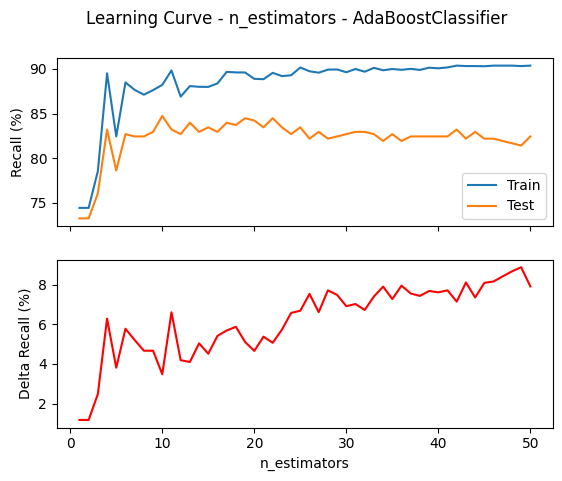

In [94]:
#plot learning curve untuk perbedaan tiap parameter
train_scores = []
test_scores = []
delta_scores = []

for c in list_estimator:
    model = AdaBoostClassifier(random_state=42,algorithm='SAMME.R', n_estimators=c)
    model.fit(x_train, y_train)

    # eval on train
    y_pred_train = model.predict(x_train)
    train_recall = round(recall_score(y_train, y_pred_train)*100,2)
    train_scores.append(train_recall)

    # eval on test
    y_pred = model.predict(x_test)
    test_recall = round(recall_score(y_test, y_pred)*100,2)
    test_scores.append(test_recall)
    
    #delta score
    delta_score = abs(train_recall-test_recall)
    delta_scores.append(delta_score)

    print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + ' delta: ' + str(delta_score))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Learning Curve - n_estimators - AdaBoostClassifier')

ax1.plot(list_estimator, train_scores, label='Train')
ax1.plot(list_estimator, test_scores, label='Test')
ax1.set_ylabel('Recall (%)')
ax1.legend()

ax2.plot(list_estimator, delta_scores,color='red')
ax2.set_ylabel('Delta Recall (%)')
plt.xlabel('n_estimators')

plt.show()

terpilih n_estimator terbaik adalah 10 karena memiliki delta recall yang kecil yaitu sebesar 3.4799 dengan score recall train dan test masing-masing sebesar 88.21 dan 84.73.

##### learning_rate

In [95]:
list_learning = [float(x) for x in np.linspace(0.001, 1, 10)]

param value: 0.001; train: 74.45; test: 73.28 delta: 1.1700000000000017
param value: 0.112; train: 79.08; test: 75.06 delta: 4.019999999999996
param value: 0.223; train: 87.22; test: 83.72 delta: 3.5
param value: 0.334; train: 86.57; test: 81.68 delta: 4.889999999999986
param value: 0.445; train: 89.69; test: 83.97 delta: 5.719999999999999
param value: 0.556; train: 88.99; test: 83.97 delta: 5.019999999999996
param value: 0.667; train: 88.83; test: 84.99 delta: 3.8400000000000034
param value: 0.778; train: 88.16; test: 84.73 delta: 3.4299999999999926
param value: 0.889; train: 88.1; test: 84.73 delta: 3.3699999999999903
param value: 1.0; train: 88.21; test: 84.73 delta: 3.4799999999999898


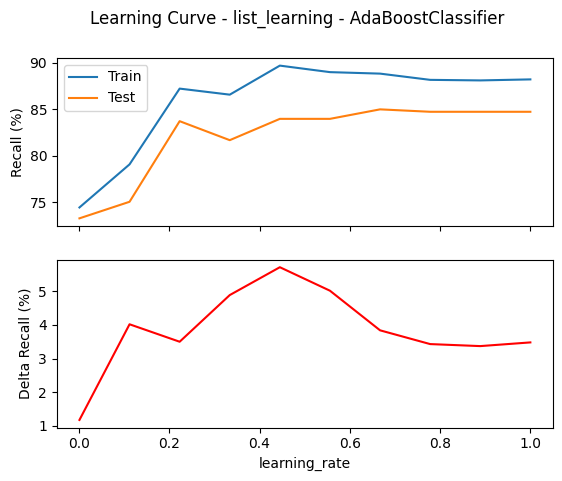

In [96]:
#plot learning curve untuk perbedaan tiap parameter
train_scores = []
test_scores = []
delta_scores = []

for c in list_learning:
    model = AdaBoostClassifier(random_state=42,algorithm='SAMME.R', n_estimators=10, learning_rate=c)
    model.fit(x_train, y_train)

    # eval on train
    y_pred_train = model.predict(x_train)
    train_recall = round(recall_score(y_train, y_pred_train)*100,2)
    train_scores.append(train_recall)

    # eval on test
    y_pred = model.predict(x_test)
    test_recall = round(recall_score(y_test, y_pred)*100,2)
    test_scores.append(test_recall)
    
    #delta score
    delta_score = abs(train_recall-test_recall)
    delta_scores.append(delta_score)

    print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + ' delta: ' + str(delta_score))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Learning Curve - list_learning - AdaBoostClassifier')

ax1.plot(list_learning, train_scores, label='Train')
ax1.plot(list_learning, test_scores, label='Test')
ax1.set_ylabel('Recall (%)')
ax1.legend()

ax2.plot(list_learning, delta_scores,color='red')
ax2.set_ylabel('Delta Recall (%)')
plt.xlabel('learning_rate')

plt.show()

In [97]:
model = AdaBoostClassifier(random_state=42,n_estimators=10,algorithm='SAMME.R',learning_rate=0.8)
model.fit(x_train,y_train)
print(eval_classification(model))

Recall (Test Set): 0.847
Recall (Train Set): 0.882
recall (crossval test): 0.832
recall (crossval train): 0.834
None


##### Kesimpulan Tuning Manual

dengan tuning `manual` pada model `AdaBoostClassifier` didapatkan parameter terbaik sebagai berikut:
- `algorithm` = SAMME.R
- `n_estimator` = 10
- `learning_rate` = 0.8

mendapatkan score sebesar :
- Recall (Test Set): 0.847
- Recall (Train Set): 0.882

- recall (crossval train): 0.834
- recall (crossval test): 0.83

#### Tuning GridSearch

In [98]:
#kode berikut kami hastag karena memakan waktu hasil parameter terbaik ada di line selanjutnya

# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.metrics import classification_report
# 
# # AdaBoostClassifier
# abc = AdaBoostClassifier(random_state=42)
# 
# # Parameter grid untuk AdaBoostClassifier
# param_grid_abc = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
# }
# 
# # Membuat objek GridSearchCV untuk AdaBoostClassifier
# grid_search_abc = GridSearchCV(estimator=abc,
#                                param_grid=param_grid_abc,
#                                scoring='recall',  # Sesuaikan dengan metrik evaluasi yang diinginkan
#                                cv=5,  # Jumlah lipatan cross-validation
#                                n_jobs=-1,
#                                verbose=2)
# 
# # Melatih model AdaBoostClassifier dengan hyperparameter terbaik
# grid_search_abc.fit(x_train, y_train)
# 
# # Mendapatkan hyperparameter terbaik
# best_params_abc = grid_search_abc.best_params_
# 
# # Mencetak hyperparameter terbaik
# print("Best Hyperparameters for AdaBoostClassifier:", best_params_abc)

In [99]:
#parameter berasal dari gridsearch
model = AdaBoostClassifier(random_state=42,n_estimators=200,algorithm='SAMME.R',learning_rate=0.01)
model.fit(x_train,y_train)
print(eval_classification(model))

Recall (Test Set): 0.865
Recall (Train Set): 0.907
recall (crossval test): 0.783
recall (crossval train): 0.786
None


#### Kesimpulan

In [100]:
model = AdaBoostClassifier(random_state=42,n_estimators=10,algorithm='SAMME.R',learning_rate=0.8)
model.fit(x_train,y_train)

print('report test :')
print(classification_report(y_test, model.predict(x_test)))
print('report train :')
print(classification_report(y_train, model.predict(x_train)))

report test :
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      1607
           1       0.40      0.85      0.54       393

    accuracy                           0.72      2000
   macro avg       0.67      0.77      0.67      2000
weighted avg       0.84      0.72      0.75      2000

report train :
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      4111
           1       0.87      0.88      0.88      5531

    accuracy                           0.86      9642
   macro avg       0.86      0.86      0.86      9642
weighted avg       0.86      0.86      0.86      9642



### 2) GradientBoosting, df9_x_train

In [101]:
feature = ['CreditScore','Age','Gender','Tenure', 'Balance','NumOfProducts', 'EstimatedSalary',
            'Geography_France','Geography_Germany','Geography_Spain',
            'TenureByAge','CreditScoreGivenAge','HasCrCard','IsActiveMember']

x_train = df9_x_train[feature].copy()
y_train = df9_y_train.copy()
x_test  = df_SS_test[feature].copy()
X  = x_train.append(x_test)
y  = y_train.append(y_test)

In [102]:
model = GradientBoostingClassifier(random_state=42)
model.fit(x_train,y_train)
print(eval_classification(model))

Recall (Test Set): 0.814
Recall (Train Set): 0.936
recall (crossval test): 0.877
recall (crossval train): 0.899
None


#### Tuning Manual

##### n_estimators

In [103]:
list_estimator= [int(x) for x in np.linspace(1, 100, 100)]

param value: 1; train: 100.0; test: 100.0 delta: 0.0
param value: 2; train: 97.29; test: 94.66 delta: 2.6300000000000097
param value: 3; train: 97.29; test: 94.66 delta: 2.6300000000000097
param value: 4; train: 96.89; test: 93.89 delta: 3.0
param value: 5; train: 92.12; test: 86.77 delta: 5.3500000000000085
param value: 6; train: 92.88; test: 88.8 delta: 4.079999999999998
param value: 7; train: 93.08; test: 88.3 delta: 4.780000000000001
param value: 8; train: 90.29; test: 84.22 delta: 6.070000000000007
param value: 9; train: 89.68; test: 83.97 delta: 5.710000000000008
param value: 10; train: 89.19; test: 82.7 delta: 6.489999999999995
param value: 11; train: 89.53; test: 82.44 delta: 7.090000000000003
param value: 12; train: 89.51; test: 82.95 delta: 6.560000000000002
param value: 13; train: 89.53; test: 82.7 delta: 6.829999999999998
param value: 14; train: 88.99; test: 82.44 delta: 6.549999999999997
param value: 15; train: 88.95; test: 81.93 delta: 7.019999999999996
param value: 16; t

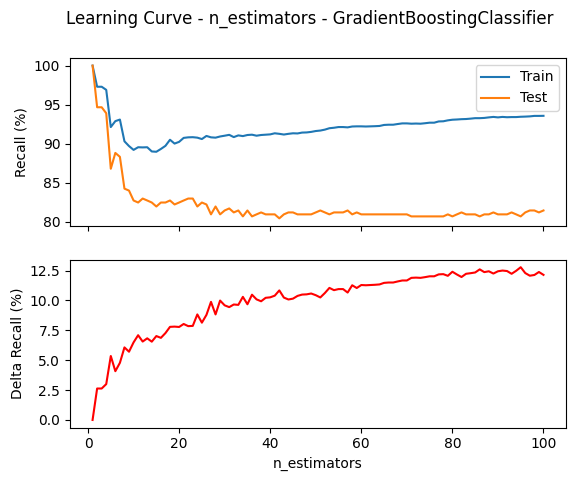

In [104]:
#plot learning curve untuk perbedaan tiap parameter
train_scores = []
test_scores = []
delta_scores = []

for c in list_estimator:
    model = GradientBoostingClassifier(random_state=42, n_estimators=c)
    model.fit(x_train, y_train)

    # eval on train
    y_pred_train = model.predict(x_train)
    train_recall = round(recall_score(y_train, y_pred_train)*100,2)
    train_scores.append(train_recall)

    # eval on test
    y_pred = model.predict(x_test)
    test_recall = round(recall_score(y_test, y_pred)*100,2)
    test_scores.append(test_recall)
    
    #delta score
    delta_score = abs(train_recall-test_recall)
    delta_scores.append(delta_score)

    print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + ' delta: ' + str(delta_score))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Learning Curve - n_estimators - GradientBoostingClassifier')

ax1.plot(list_estimator, train_scores, label='Train')
ax1.plot(list_estimator, test_scores, label='Test')
ax1.set_ylabel('Recall (%)')
ax1.legend()

ax2.plot(list_estimator, delta_scores,color='red')
ax2.set_ylabel('Delta Recall (%)')
plt.xlabel('n_estimators')

plt.show()

##### learning_rate

In [105]:
list_learning = [float(x) for x in np.linspace(0.001, 1, 100)]

param value: 0.001; train: 100.0; test: 100.0 delta: 0.0
param value: 0.011090909090909092; train: 100.0; test: 100.0 delta: 0.0
param value: 0.021181818181818184; train: 97.29; test: 94.66 delta: 2.6300000000000097
param value: 0.03127272727272727; train: 96.89; test: 93.38 delta: 3.510000000000005
param value: 0.041363636363636366; train: 93.36; test: 89.31 delta: 4.049999999999997
param value: 0.05145454545454546; train: 94.05; test: 90.08 delta: 3.969999999999999
param value: 0.06154545454545455; train: 90.63; test: 85.5 delta: 5.1299999999999955
param value: 0.07163636363636364; train: 89.78; test: 84.22 delta: 5.560000000000002
param value: 0.08172727272727273; train: 89.53; test: 83.97 delta: 5.560000000000002
param value: 0.09181818181818183; train: 89.69; test: 82.95 delta: 6.739999999999995
param value: 0.10190909090909092; train: 90.07; test: 83.97 delta: 6.099999999999994
param value: 0.112; train: 88.75; test: 81.42 delta: 7.329999999999998
param value: 0.1220909090909091;

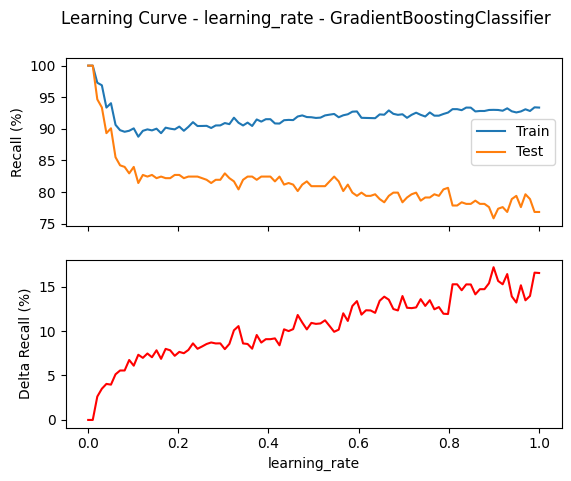

In [106]:
#plot learning curve untuk perbedaan tiap parameter
train_scores = []
test_scores = []
delta_scores = []

for c in list_learning:
    model = GradientBoostingClassifier(random_state=42, learning_rate=c,n_estimators=12)
    model.fit(x_train, y_train)

    # eval on train
    y_pred_train = model.predict(x_train)
    train_recall = round(recall_score(y_train, y_pred_train)*100,2)
    train_scores.append(train_recall)

    # eval on test
    y_pred = model.predict(x_test)
    test_recall = round(recall_score(y_test, y_pred)*100,2)
    test_scores.append(test_recall)
    
    #delta score
    delta_score = abs(train_recall-test_recall)
    delta_scores.append(delta_score)

    print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + ' delta: ' + str(delta_score))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Learning Curve - learning_rate - GradientBoostingClassifier')

ax1.plot(list_learning, train_scores, label='Train')
ax1.plot(list_learning, test_scores, label='Test')
ax1.set_ylabel('Recall (%)')
ax1.legend()

ax2.plot(list_learning, delta_scores,color='red')
ax2.set_ylabel('Delta Recall (%)')
plt.xlabel('learning_rate')

plt.show()

##### max Depth

In [107]:
list_depth = [int(x) for x in np.linspace(1, 10, 10)]

param value: 1; train: 85.5; test: 81.68 delta: 3.819999999999993
param value: 2; train: 88.32; test: 82.19 delta: 6.1299999999999955
param value: 3; train: 90.35; test: 82.7 delta: 7.6499999999999915
param value: 4; train: 91.76; test: 81.17 delta: 10.590000000000003
param value: 5; train: 92.75; test: 80.15 delta: 12.599999999999994
param value: 6; train: 94.5; test: 79.64 delta: 14.86
param value: 7; train: 95.28; test: 77.61 delta: 17.67
param value: 8; train: 97.2; test: 76.84 delta: 20.36
param value: 9; train: 98.97; test: 75.57 delta: 23.400000000000006
param value: 10; train: 99.42; test: 74.3 delta: 25.120000000000005


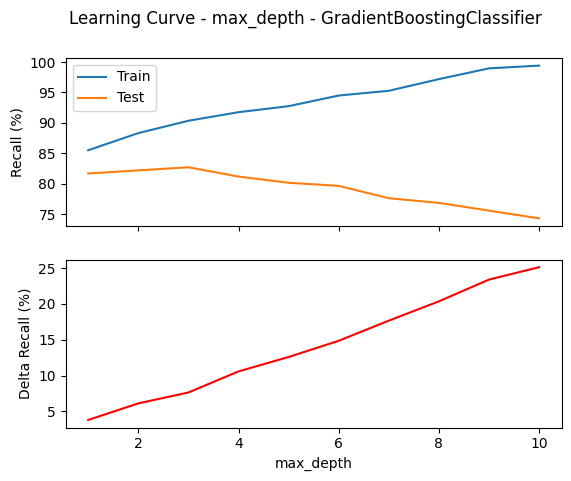

In [108]:
#plot learning curve untuk perbedaan tiap parameter
train_scores = []
test_scores = []
delta_scores = []

for c in list_depth:
    model = GradientBoostingClassifier(random_state=42, 
                                       learning_rate=0.2, 
                                       n_estimators=12, 
                                       max_depth=c)
    model.fit(x_train, y_train)

    # eval on train
    y_pred_train = model.predict(x_train)
    train_recall = round(recall_score(y_train, y_pred_train)*100,2)
    train_scores.append(train_recall)

    # eval on test
    y_pred = model.predict(x_test)
    test_recall = round(recall_score(y_test, y_pred)*100,2)
    test_scores.append(test_recall)
    
    #delta score
    delta_score = abs(train_recall-test_recall)
    delta_scores.append(delta_score)

    print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + ' delta: ' + str(delta_score))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Learning Curve - max_depth - GradientBoostingClassifier')

ax1.plot(list_depth, train_scores, label='Train')
ax1.plot(list_depth, test_scores, label='Test')
ax1.set_ylabel('Recall (%)')
ax1.legend()

ax2.plot(list_depth, delta_scores,color='red')
ax2.set_ylabel('Delta Recall (%)')
plt.xlabel('max_depth')

plt.show()

##### min_sample_leaf

In [109]:
list_leaf = [int(x) for x in np.linspace(1, 100, 100)]

param value: 1; train: 90.35; test: 82.7 delta: 7.6499999999999915
param value: 2; train: 90.35; test: 82.7 delta: 7.6499999999999915
param value: 3; train: 90.35; test: 82.7 delta: 7.6499999999999915
param value: 4; train: 90.35; test: 82.7 delta: 7.6499999999999915
param value: 5; train: 90.35; test: 82.7 delta: 7.6499999999999915
param value: 6; train: 90.35; test: 82.7 delta: 7.6499999999999915
param value: 7; train: 90.35; test: 82.7 delta: 7.6499999999999915
param value: 8; train: 90.35; test: 82.7 delta: 7.6499999999999915
param value: 9; train: 90.35; test: 82.7 delta: 7.6499999999999915
param value: 10; train: 90.35; test: 82.7 delta: 7.6499999999999915
param value: 11; train: 90.35; test: 82.7 delta: 7.6499999999999915
param value: 12; train: 90.35; test: 82.7 delta: 7.6499999999999915
param value: 13; train: 90.35; test: 82.7 delta: 7.6499999999999915
param value: 14; train: 90.35; test: 82.7 delta: 7.6499999999999915
param value: 15; train: 90.35; test: 82.7 delta: 7.649999

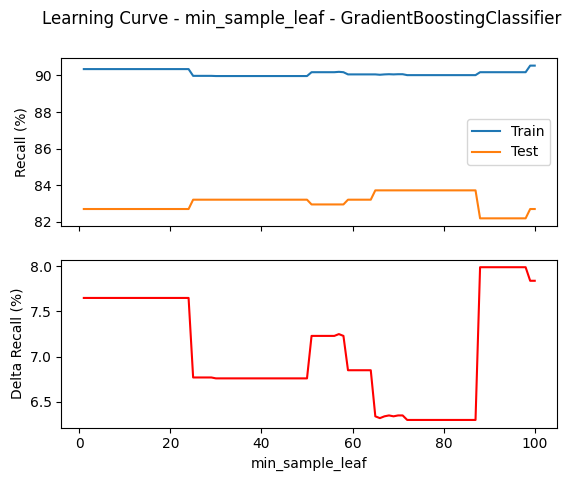

In [110]:
#plot learning curve untuk perbedaan tiap parameter
train_scores = []
test_scores = []
delta_scores = []

for c in list_leaf:
    model = GradientBoostingClassifier(random_state=42, 
                                       learning_rate=0.2, 
                                       n_estimators=12, 
                                       max_depth=3,
                                       min_samples_leaf=c)
    model.fit(x_train, y_train)

    # eval on train
    y_pred_train = model.predict(x_train)
    train_recall = round(recall_score(y_train, y_pred_train)*100,2)
    train_scores.append(train_recall)

    # eval on test
    y_pred = model.predict(x_test)
    test_recall = round(recall_score(y_test, y_pred)*100,2)
    test_scores.append(test_recall)
    
    #delta score
    delta_score = abs(train_recall-test_recall)
    delta_scores.append(delta_score)

    print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + ' delta: ' + str(delta_score))

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Learning Curve - min_sample_leaf - GradientBoostingClassifier')

ax1.plot(list_leaf, train_scores, label='Train')
ax1.plot(list_leaf, test_scores, label='Test')
ax1.set_ylabel('Recall (%)')
ax1.legend()

ax2.plot(list_leaf, delta_scores,color='red')
ax2.set_ylabel('Delta Recall (%)')
plt.xlabel('min_sample_leaf')

plt.show()

In [111]:
model = GradientBoostingClassifier(random_state=42,n_estimators=16,learning_rate=0.2,max_depth=2)
model.fit(x_train,y_train)
print(eval_classification(model))

Recall (Test Set): 0.827
Recall (Train Set): 0.892
recall (crossval test): 0.835
recall (crossval train): 0.842
None


##### Kesimpulan Tuning Manual

dengan tuning `manual` pada model `GradientBoostingClassifier` didapatkan parameter terbaik sebagai berikut:
- `n_estimator` = 12
- `learning_rate` = 0.2
- `max depth` = 3
- `min_sample_leaf` = 65

mendapatkan score sebesar :
- Recall (Test Set): 0.837
- Recall (Train Set): 0.901

- recall (crossval test): 0.84.4
- recall (crossval train): 0.851

#### Tuning GridSearch

In [112]:
#kode berikut kami hastag karena memakan waktu hasil parameter terbaik ada di line selanjutnya

# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
# 
# # Gradient Boosting
# gbc = GradientBoostingClassifier(random_state=42)
# 
# # Parameter grid untuk Gradient Boosting
# param_grid_gbc = {
#     'n_estimators': [10, 20, 30],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'subsample': [0.8, 0.9, 1.0]
# }
# 
# # Membuat objek GridSearchCV untuk Gradient Boosting
# grid_search_gbc = GridSearchCV(estimator=gbc,
#                                param_grid=param_grid_gbc,
#                                scoring='recall',  # Sesuaikan dengan metrik evaluasi yang diinginkan
#                                cv=5,  # Jumlah lipatan cross-validation
#                                n_jobs=-1,
#                                verbose=2)
# 
# # Melatih model Gradient Boosting dengan hyperparameter terbaik
# grid_search_gbc.fit(x_train, y_train)
# 
# # Mendapatkan hyperparameter terbaik
# best_params_gbc = grid_search_gbc.best_params_
# 
# # Mencetak hyperparameter terbaik
# print("Best Hyperparameters for Gradient Boosting:", best_params_gbc)

In [113]:
#parameter berasal dari gridsearch
model = GradientBoostingClassifier(random_state=42,n_estimators=10,learning_rate=0.01,max_depth=3,
                                  min_samples_leaf=1, min_samples_split=2, subsample=0.8)
model.fit(x_train,y_train)
print(eval_classification(model))

Recall (Test Set): 1.000
Recall (Train Set): 1.000
recall (crossval test): 0.862
recall (crossval train): 0.87
None


#### Kesimpulan

In [114]:
model = GradientBoostingClassifier(random_state=42,n_estimators=10,learning_rate=0.01,max_depth=3,
                                  min_samples_leaf=1, min_samples_split=2, subsample=0.8)
model.fit(x_train,y_train)
print('report test :')
print(classification_report(y_test, model.predict(x_test)))
print('report train :')
print(classification_report(y_train, model.predict(x_train)))

report test :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1607
           1       0.20      1.00      0.33       393

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.16      2000
weighted avg       0.04      0.20      0.06      2000

report train :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4111
           1       0.57      1.00      0.73      5531

    accuracy                           0.57      9642
   macro avg       0.29      0.50      0.36      9642
weighted avg       0.33      0.57      0.42      9642



### Hasil Akhir

Terpilih Adaboosting Classifier dengan parameter tuning manual

In [116]:
from sklearn.metrics import confusion_matrix

model = AdaBoostClassifier(random_state=42,n_estimators=10,algorithm='SAMME.R',learning_rate=0.8)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

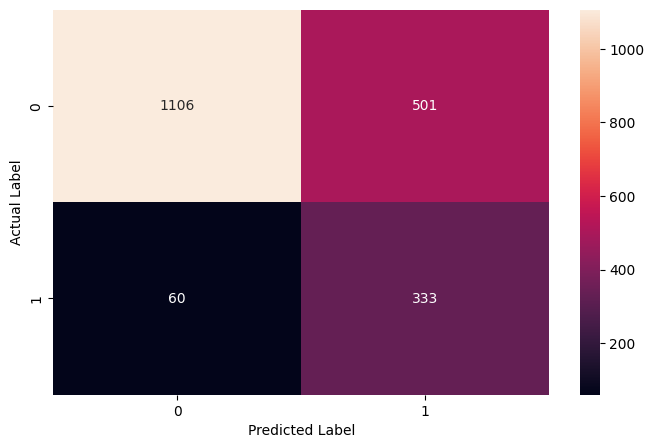

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

## Feature Importants

                Feature  Importance
0           CreditScore         0.0
3                Tenure         0.0
4               Balance         0.0
6       EstimatedSalary         0.0
7      Geography_France         0.0
9       Geography_Spain         0.0
10          TenureByAge         0.0
11  CreditScoreGivenAge         0.0
12            HasCrCard         0.0
2                Gender         0.1
8     Geography_Germany         0.1
13       IsActiveMember         0.1
5         NumOfProducts         0.3
1                   Age         0.4


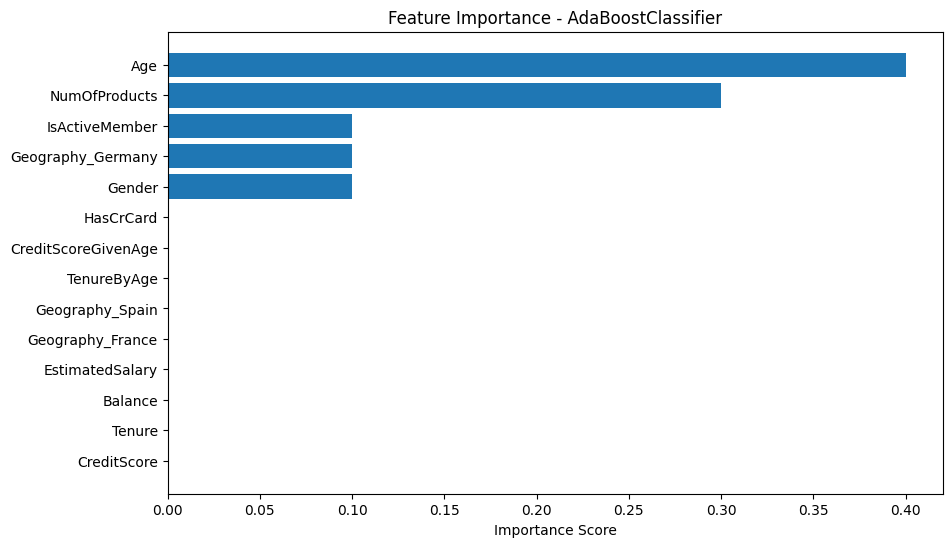

In [115]:
# Inisialisasi dan latih model Gradient Boosting
model = AdaBoostClassifier(random_state=42,n_estimators=10,algorithm='SAMME.R',learning_rate=0.8)
model.fit(x_train, y_train)

# Dapatkan feature importance
feature_importance = model.feature_importances_

# Buat DataFrame untuk lebih mudah visualisasi
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})

# Urutkan DataFrame berdasarkan nilai importance secara menurun
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Tampilkan feature importance
print(importance_df)

# Visualisasikan feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance - AdaBoostClassifier')
plt.show()
